In [1]:
# Library importation

# General data libraries
import pandas as pd
import numpy as np

# Basic
import operator
from pprint import pprint
import os
import json

# Figures
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib.cm as cm

import plotly.express as px

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import webbrowser

# import the wordcloud library
from wordcloud import WordCloud

# Dataframe column views
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Text pre-processing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans

# ML
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from gensim.corpora import Dictionary
from gensim.models import ldamodel, ldamulticore, coherencemodel, Nmf, Word2Vec, KeyedVectors

# Computing time
import timeit

# Metrics
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from yellowbrick.cluster import SilhouetteVisualizer

C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:34: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\vince\anaconda3\lib\site-packages\sklearn\linear_model\_least_angle.py:164: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Import of cleaning functions
from cleaning59 import na_rows_list, na_raw_drop_df, min_row_data_rate_list, min_row_data_rate_df, column_data_rate, column_data_rate_mean, columns_not_in_list, columns_delete_df, min_column_data_rate_df, low_outlier_filter_df, high_outlier_filter_df, dic_high_outlier_filter_df, word_column_filter_df, word_column_filter_lst, sign_invert_filter_df, common_elements, separate_elements 

In [4]:
# Import of graph functions
from plotting03 import bi_joint_plot

C:\Users\vince\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
# Import of ML functions
from ML20 import OneHotEncoder, label_encoding_transform_with_merge, target_encoding_transform_with_merge, vector_encoding_transform_with_merge, encoding_transform_with_merge

# DATA READING

In [6]:
# data reading and viewing
flipkart_dataset = pd.read_csv("projets\\06_classifiez_automatiquement_des_biens_de_consommation\\Flipkart\\flipkart_com-ecommerce_sample_1050.csv",sep=',',dtype='object')
flipkart_dataset.head()

uniq_id            crawl_timestamp  \
0  55b85ea15a1536d46b7190ad6fff8ce7  2016-04-30 03:22:56 +0000   
1  7b72c92c2f6c40268628ec5f14c6d590  2016-04-30 03:22:56 +0000   
2  64d5d4a258243731dc7bbb1eef49ad74  2016-04-30 03:22:56 +0000   
3  d4684dcdc759dd9cdf41504698d737d8  2016-06-20 08:49:52 +0000   
4  6325b6870c54cd47be6ebfbffa620ec7  2016-06-20 08:49:52 +0000   

                                         product_url  \
0  http://www.flipkart.com/elegance-polyester-mul...   
1  http://www.flipkart.com/sathiyas-cotton-bath-t...   
2  http://www.flipkart.com/eurospa-cotton-terry-f...   
3  http://www.flipkart.com/santosh-royal-fashion-...   
4  http://www.flipkart.com/jaipur-print-cotton-fl...   

                                        product_name  \
0  Elegance Polyester Multicolor Abstract Eyelet ...   
1                         Sathiyas Cotton Bath Towel   
2                Eurospa Cotton Terry Face Towel Set   
3  SANTOSH ROYAL FASHION Cotton Printed King size...   
4  Jaipur Print Cotton Floral King sized Double B...   

                               product_category_tree               pid  \
0  ["Home Furnishing >> Curtains & Accessories >>...  CRNEG7BKMFFYHQ8Z   
1  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEGFZHGBXPHZUH   
2  ["Baby Care >> Baby Bath & Skin >> Baby Bath T...  BTWEG6SHXTDB2A2Y   
3  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJT9UQWHDUBH4   
4  ["Home Furnishing >> Bed Linen >> Bedsheets >>...  BDSEJTHNGWVGWWQU   

  retail_price discounted_price                                 image  \
0       1899.0            899.0  55b85ea15a1536d46b7190ad6fff8ce7.jpg   
1        600.0            449.0  7b72c92c2f6c40268628ec5f14c6d590.jpg   
2          NaN              NaN  64d5d4a258243731dc7bbb1eef49ad74.jpg   
3       2699.0           1299.0  d4684dcdc759dd9cdf41504698d737d8.jpg   
4       2599.0            698.0  6325b6870c54cd47be6ebfbffa620ec7.jpg   

  is_FK_Advantage_product                                        description  \
0                   False  Key Features of Elegance Polyester Multicolor ...   
1                   False  Specifications of Sathiyas Cotton Bath Towel (...   
2                   False  Key Features of Eurospa Cotton Terry Face Towe...   
3                   False  Key Features of SANTOSH ROYAL FASHION Cotton P...   
4                   False  Key Features of Jaipur Print Cotton Floral Kin...   

        product_rating       overall_rating                  brand  \
0  No rating available  No rating available               Elegance   
1  No rating available  No rating available               Sathiyas   
2  No rating available  No rating available                Eurospa   
3  No rating available  No rating available  SANTOSH ROYAL FASHION   
4  No rating available  No rating available           Jaipur Print   

                              product_specifications  
0  {"product_specification"=>[{"key"=>"Brand", "v...  
1  {"product_specification"=>[{"key"=>"Machine Wa...  
2  {"product_specification"=>[{"key"=>"Material",...  
3  {"product_specification"=>[{"key"=>"Brand", "v...  
4  {"product_specification"=>[{"key"=>"Machine Wa...

In [7]:
flipkart_dataset.shape

(1050, 15)

In [8]:
# Column filling rate
column_data_rate_mean(flipkart_dataset)

0.9783492063492064

In [9]:
# Unique products
flipkart_dataset['uniq_id'].nunique()

1050

# DATA CLEANING

In [10]:
# Casting
flipkart_dataset['crawl_timestamp'] = pd.to_datetime(flipkart_dataset['crawl_timestamp'])

# DATAVIZ 01

## Products cumulative

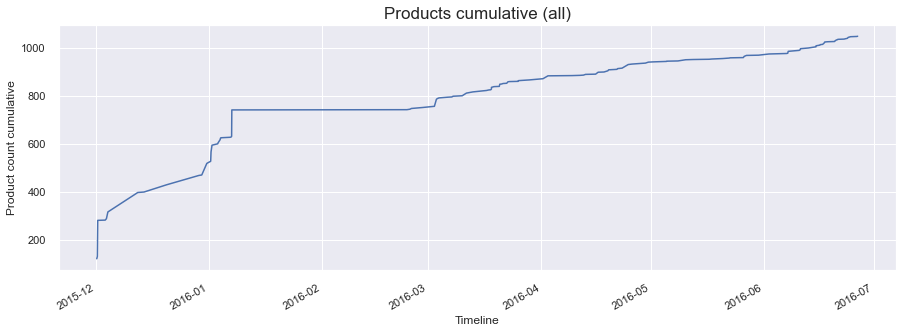

In [11]:
# Graph of products cumulative
flipkart_dataset.groupby('crawl_timestamp').count().cumsum()['uniq_id'].plot(figsize=(15,5))
plt.title('Products cumulative (all)', fontsize=17)
plt.xlabel('Timeline')
plt.ylabel('Product count cumulative');

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\all\\Product_count_cumulative.png", transparent=True, dpi=300)

# TEXT PROCESSING

In [12]:
flipkart_dataset['processed_description'] = flipkart_dataset['description']

In [13]:
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].astype('str')

In [14]:
flipkart_dataset['processed_description'][0:10]

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel (...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time R8851116001 Analog Watch  - For ...
6    Camerii WM64 Elegance Analog Watch  - For Men,...
7    T STAR UFT-TSW-005-BK-BR Analog Watch  - For B...
8    Alfajr WY16B Youth Digital Watch  - For Men, B...
9    TAG Heuer CAU1116.BA0858 Formula 1 Analog Watc...
Name: processed_description, dtype: object

## Text cleaning

### Punctuation

In [15]:
# remove punctuation
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
flipkart_dataset['processed_description'][0:10]

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel 3...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time R8851116001 Analog Watch   For B...
6    Camerii WM64 Elegance Analog Watch   For Men B...
7    T STAR UFTTSW005BKBR Analog Watch   For Boys\r...
8    Alfajr WY16B Youth Digital Watch   For Men Boy...
9    TAG Heuer CAU1116BA0858 Formula 1 Analog Watch...
Name: processed_description, dtype: object

### Remove words and digits containing digits

In [16]:
#remove words and digits
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: re.sub(r"\S*\d\S*",'',x))
flipkart_dataset['processed_description'][0:10]

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel  ...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time  Analog Watch   For Boys  Buy Ma...
6    Camerii  Elegance Analog Watch   For Men Boys ...
7    T STAR  Analog Watch   For Boys\r\n           ...
8    Alfajr  Youth Digital Watch   For Men Boys  Bu...
9    TAG Heuer  Formula  Analog Watch   For Boys Me...
Name: processed_description, dtype: object

### Noise Removal

In [17]:
def scrub_words(text):
    """Basic cleaning of texts."""
    
    # remove html markup
    text=re.sub("(<.*?>)","",text)
    
    # remove non-ascii and digits
    text=re.sub("(\\W|\\d)"," ",text)
    
    # remove whitespace
    text=text.strip()
    return text

In [18]:
# noise cleaning (digits and puntuation)
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: scrub_words(x))
flipkart_dataset['processed_description'][0:10]

0    Key Features of Elegance Polyester Multicolor ...
1    Specifications of Sathiyas Cotton Bath Towel  ...
2    Key Features of Eurospa Cotton Terry Face Towe...
3    Key Features of SANTOSH ROYAL FASHION Cotton P...
4    Key Features of Jaipur Print Cotton Floral Kin...
5    Maserati Time  Analog Watch   For Boys  Buy Ma...
6    Camerii  Elegance Analog Watch   For Men Boys ...
7    T STAR  Analog Watch   For Boys               ...
8    Alfajr  Youth Digital Watch   For Men Boys  Bu...
9    TAG Heuer  Formula  Analog Watch   For Boys Me...
Name: processed_description, dtype: object

### Tokenization, lower case, stop words

In [19]:
def tokens(txt):
    """Tokenization, lower case and removal of stop words"""
    tokens = nltk.wordpunct_tokenize(txt)
    tokens = [tok.lower() for tok in tokens if tok.lower() not in stopwords.words("english")]
    
    return tokens

In [20]:
# Tokenization, lower case and removal of stop words
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: tokens(x))
flipkart_dataset['processed_description'][0:10]

0    [key, features, elegance, polyester, multicolo...
1    [specifications, sathiyas, cotton, bath, towel...
2    [key, features, eurospa, cotton, terry, face, ...
3    [key, features, santosh, royal, fashion, cotto...
4    [key, features, jaipur, print, cotton, floral,...
5    [maserati, time, analog, watch, boys, buy, mas...
6    [camerii, elegance, analog, watch, men, boys, ...
7    [star, analog, watch, boys, price, rs, whether...
8    [alfajr, youth, digital, watch, men, boys, buy...
9    [tag, heuer, formula, analog, watch, boys, men...
Name: processed_description, dtype: object

### Lemmatization

In [21]:
def lemmatize(tokens):
    """Lemmatizing from token inputs"""
    
    # Init lemmatizer
    lemma = WordNetLemmatizer()
    
    # lemmatization (adjectives, verbs, nouns)
    lemma_list = [lemma.lemmatize(lemma.lemmatize(lemma.lemmatize(token,pos='a'),pos='v'),pos='n') for token in tokens]
    
    return lemma_list
    

In [22]:
# lemmatization
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: lemmatize(x))
flipkart_dataset['processed_description'][0:10]

0    [key, feature, elegance, polyester, multicolor...
1    [specification, sathiyas, cotton, bath, towel,...
2    [key, feature, eurospa, cotton, terry, face, t...
3    [key, feature, santosh, royal, fashion, cotton...
4    [key, feature, jaipur, print, cotton, floral, ...
5    [maserati, time, analog, watch, boy, buy, mase...
6    [camerii, elegance, analog, watch, men, boy, b...
7    [star, analog, watch, boy, price, r, whether, ...
8    [alfajr, youth, digital, watch, men, boy, buy,...
9    [tag, heuer, formula, analog, watch, boy, men,...
Name: processed_description, dtype: object

### Final string

In [23]:
# Stemming
flipkart_dataset['processed_description'] = flipkart_dataset['processed_description'].apply(lambda x: " ".join(x))
flipkart_dataset['processed_description'][0:10]

0    key feature elegance polyester multicolor abst...
1    specification sathiyas cotton bath towel bath ...
2    key feature eurospa cotton terry face towel se...
3    key feature santosh royal fashion cotton print...
4    key feature jaipur print cotton floral king si...
5    maserati time analog watch boy buy maserati ti...
6    camerii elegance analog watch men boy buy came...
7    star analog watch boy price r whether way work...
8    alfajr youth digital watch men boy buy alfajr ...
9    tag heuer formula analog watch boy men buy tag...
Name: processed_description, dtype: object

### Word cloud

In [24]:
# Number of rows
len(flipkart_dataset['processed_description'])

1050

In [25]:
# creating the complete corpus
text = ""
for i in range(0, len(flipkart_dataset['processed_description'])):
    text = str(text) + flipkart_dataset['processed_description'].iloc[i]

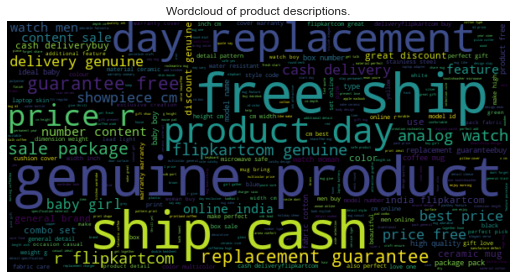

In [26]:
# Instantiate a new wordcloud.
wordcloud = WordCloud(random_state = 8,
        normalize_plurals = False,
        width = 600, height= 300,
        max_words = 300,
        stopwords = [])
# Apply the wordcloud to the text.
wordcloud.generate(text)

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))
# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')
# and remove the axis
plt.axis("off")
# title
plt.title('Wordcloud of product descriptions.')
# save
plt.savefig('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\wordcloud.png',dpi=300)

plt.show()

## Target definition

In [27]:
flipkart_dataset.product_category_tree

0       ["Home Furnishing >> Curtains & Accessories >>...
1       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
2       ["Baby Care >> Baby Bath & Skin >> Baby Bath T...
3       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
4       ["Home Furnishing >> Bed Linen >> Bedsheets >>...
                              ...                        
1045    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1046    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1047    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1048    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
1049    ["Baby Care >> Baby & Kids Gifts >> Stickers >...
Name: product_category_tree, Length: 1050, dtype: object

In [28]:
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['product_category_tree']

In [29]:
# Split
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: x.split(">>"))
flipkart_dataset['processed_product_category_tree'][0:10]

0    [["Home Furnishing ,  Curtains & Accessories ,...
1    [["Baby Care ,  Baby Bath & Skin ,  Baby Bath ...
2    [["Baby Care ,  Baby Bath & Skin ,  Baby Bath ...
3    [["Home Furnishing ,  Bed Linen ,  Bedsheets ,...
4    [["Home Furnishing ,  Bed Linen ,  Bedsheets ,...
5    [["Watches ,  Wrist Watches ,  Maserati Time W...
6    [["Watches ,  Wrist Watches ,  Camerii Wrist W...
7    [["Watches ,  Wrist Watches ,  T STAR Wrist Wa...
8    [["Watches ,  Wrist Watches ,  Alfajr Wrist Wa...
9    [["Watches ,  Wrist Watches ,  TAG Heuer Wrist...
Name: processed_product_category_tree, dtype: object

In [30]:
# Selecting the hierarchical element
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: x[0])
flipkart_dataset['processed_product_category_tree'][0:10]

0    ["Home Furnishing 
1          ["Baby Care 
2          ["Baby Care 
3    ["Home Furnishing 
4    ["Home Furnishing 
5            ["Watches 
6            ["Watches 
7            ["Watches 
8            ["Watches 
9            ["Watches 
Name: processed_product_category_tree, dtype: object

In [31]:
# puntuation cleaning
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))
flipkart_dataset['processed_product_category_tree'][0:10]

0    Home Furnishing 
1          Baby Care 
2          Baby Care 
3    Home Furnishing 
4    Home Furnishing 
5            Watches 
6            Watches 
7            Watches 
8            Watches 
9            Watches 
Name: processed_product_category_tree, dtype: object

In [32]:
# removing the right space
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: x.rstrip())
flipkart_dataset['processed_product_category_tree'][0:10]

0    Home Furnishing
1          Baby Care
2          Baby Care
3    Home Furnishing
4    Home Furnishing
5            Watches
6            Watches
7            Watches
8            Watches
9            Watches
Name: processed_product_category_tree, dtype: object

In [33]:
# removing unwanted spaces
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: re.sub(" +", " ",x))
flipkart_dataset['processed_product_category_tree'][0:10]

0    Home Furnishing
1          Baby Care
2          Baby Care
3    Home Furnishing
4    Home Furnishing
5            Watches
6            Watches
7            Watches
8            Watches
9            Watches
Name: processed_product_category_tree, dtype: object

In [34]:
# lower case
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: x.lower())
flipkart_dataset['processed_product_category_tree'][0:10]

0    home furnishing
1          baby care
2          baby care
3    home furnishing
4    home furnishing
5            watches
6            watches
7            watches
8            watches
9            watches
Name: processed_product_category_tree, dtype: object

In [35]:
# replacing whispace by '_'
flipkart_dataset['processed_product_category_tree'] = flipkart_dataset['processed_product_category_tree'].apply(lambda x: x.replace(" ", "_"))
flipkart_dataset['processed_product_category_tree'][0:10]

0    home_furnishing
1          baby_care
2          baby_care
3    home_furnishing
4    home_furnishing
5            watches
6            watches
7            watches
8            watches
9            watches
Name: processed_product_category_tree, dtype: object

In [36]:
# Main categories 
main_categories = flipkart_dataset['processed_product_category_tree'].unique()
main_categories

array(['home_furnishing', 'baby_care', 'watches',
       'home_decor_festive_needs', 'kitchen_dining',
       'beauty_and_personal_care', 'computers'], dtype=object)

In [37]:
# Number of main categories 
len(main_categories)

7

In [38]:
# saving the list in a json file
tf = open("projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\main_categ_list.json", "w")
json.dump(list(main_categories),tf)
tf.close()

In [39]:
# Creating a dictionnary
main_categ_dic = {}
for i in range(0, len(main_categories)):
    main_categ_dic[i] = main_categories[i]

main_categ_dic

{0: 'home_furnishing',
 1: 'baby_care',
 2: 'watches',
 3: 'home_decor_festive_needs',
 4: 'kitchen_dining',
 5: 'beauty_and_personal_care',
 6: 'computers'}

In [40]:
# saving the dictionnary in a json file
tf = open("projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\main_categ_dic.json", "w")
json.dump(main_categ_dic,tf)
tf.close()

In [41]:
flipkart_dataset['product_class'] = flipkart_dataset['processed_product_category_tree']

In [42]:
# transform the topic from string to integer
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[0], 'processed_product_category_tree' ] = 0
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[1], 'processed_product_category_tree' ] = 1
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[2], 'processed_product_category_tree' ] = 2
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[3], 'processed_product_category_tree' ] = 3
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[4], 'processed_product_category_tree' ] = 4
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[5], 'processed_product_category_tree' ] = 5
flipkart_dataset.loc[flipkart_dataset['processed_product_category_tree'] == main_categ_dic[6], 'processed_product_category_tree' ] = 6

In [43]:
flipkart_dataset.rename(columns={'processed_product_category_tree': 'product_class_number'}, inplace=True)

In [44]:
flipkart_dataset['product_class_number']

0       0
1       1
2       1
3       0
4       0
       ..
1045    1
1046    1
1047    1
1048    1
1049    1
Name: product_class_number, Length: 1050, dtype: object

# TEST SPLIT

In [45]:
# Sorting values by purchase dates
flipkart_dataset = flipkart_dataset.sort_values('crawl_timestamp')

C:\Users\vince\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


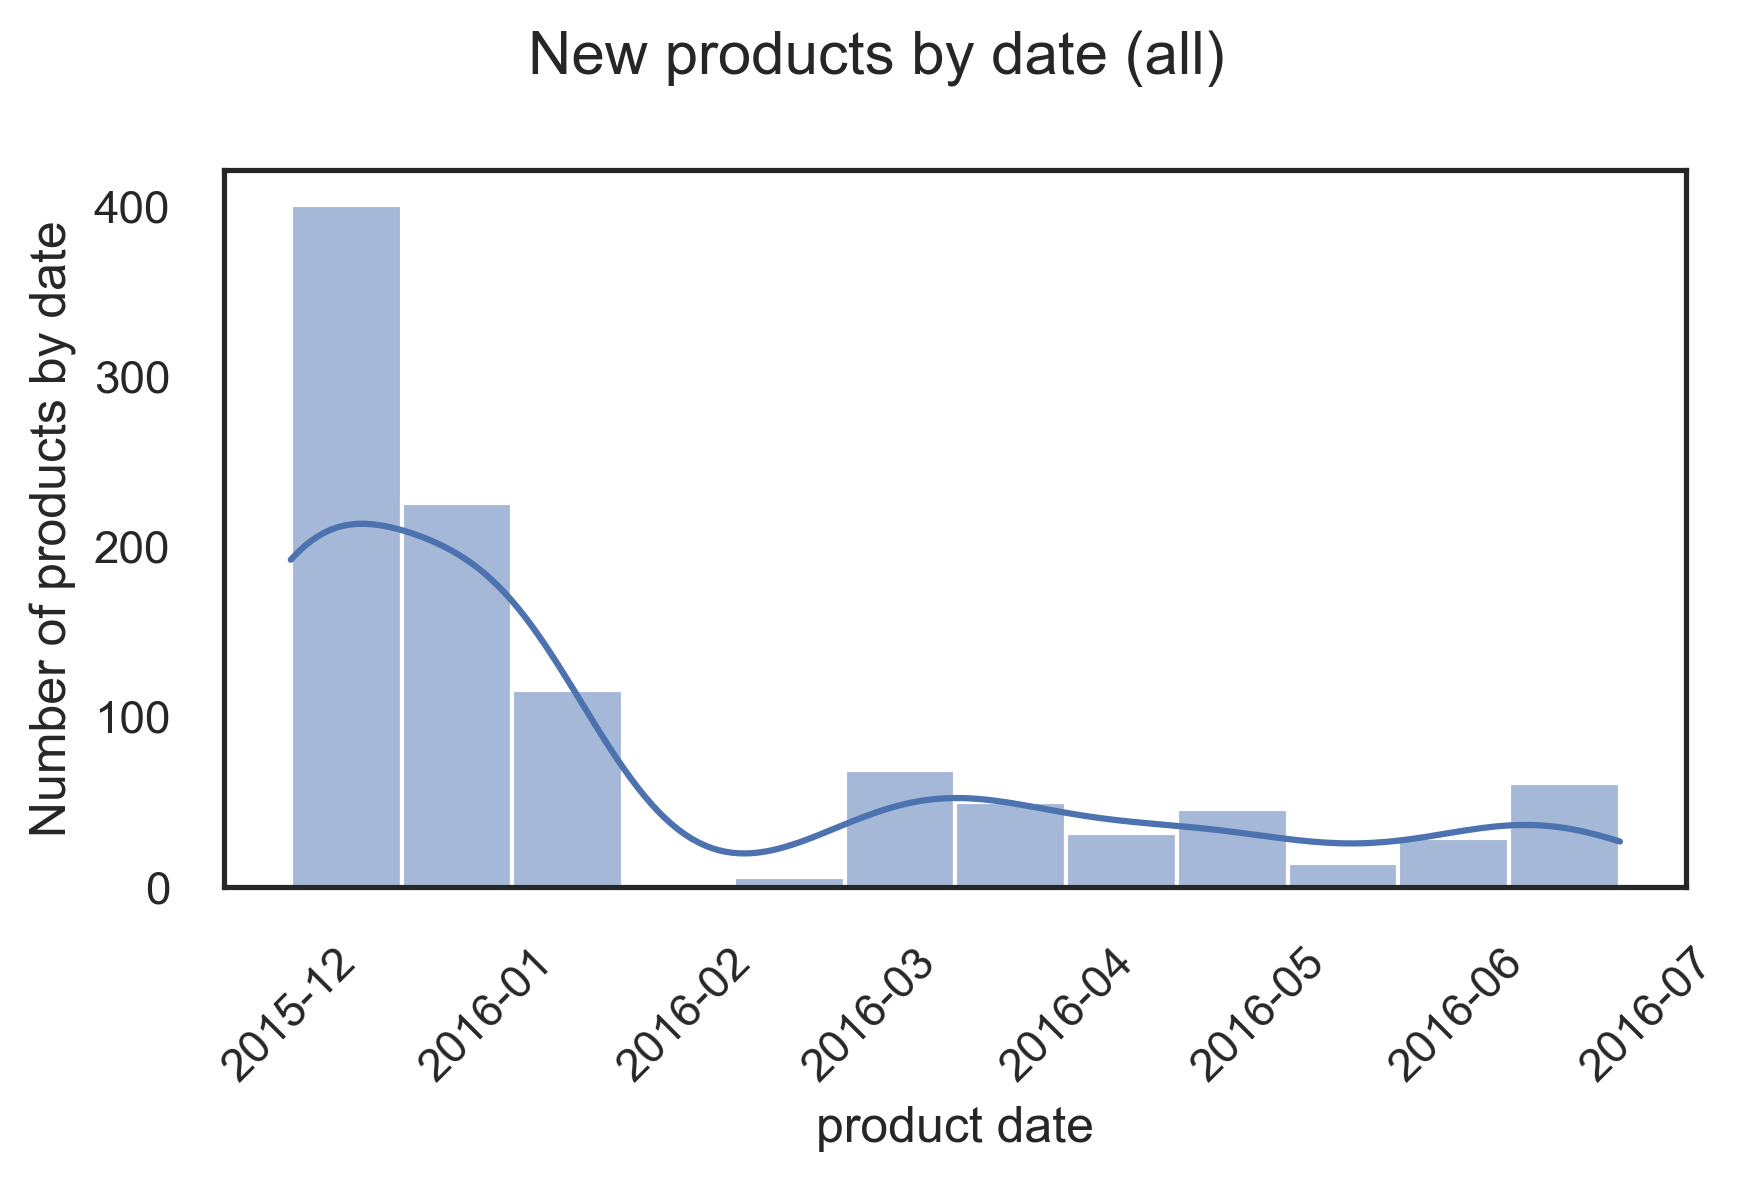

In [46]:
# Plot (with axes)
for variable in ['crawl_timestamp']:
    sns.set_theme(style="white")
    fig, ax = plt.subplots(1, 1, dpi=300, tight_layout=True)
    plot = sns.histplot(data=flipkart_dataset, x=variable, kde=True)
    
     # figure title
    fig.suptitle(f'New products by date (all)')
    
    # name of axes
    ax.set(xlabel= 'product date', ylabel='Number of products by date')
    
    # x-legend rolling
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    
# Sauvegarde
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\all\\whole_timeline_all.png", transparent=True, dpi=300)
    

## Out Of Time period (test)

In [47]:
np.quantile(flipkart_dataset.index, 0.75)

786.75

In [48]:
flipkart_dataset.iloc[786]['crawl_timestamp']

Timestamp('2016-03-03 06:06:42+0000', tz='UTC')

In [49]:
# We cut the latest 25% of products of the dataset and start at the beginning of a month
flipkart_dataset_oot = flipkart_dataset[(flipkart_dataset['crawl_timestamp']>='2016-03-01')]
flipkart_dataset_oot

uniq_id           crawl_timestamp  \
294  688bb32bf0d9b6e350d2c0912a3b7c9f 2016-03-02 16:58:31+00:00   
292  7c15895bbfd7da97c219be5b28150a06 2016-03-02 16:58:31+00:00   
291  8876d7569efdaff5a21b33a1ab44a13d 2016-03-02 16:58:31+00:00   
290  45204a03550940bdcbc8e4703c07f550 2016-03-02 16:58:31+00:00   
293  c2efa8aa11898bdb5fc4e46201973a42 2016-03-02 16:58:31+00:00   
..                                ...                       ...   
124  640fd08bb3ba538d67a5c0c2c61a5c4c 2016-06-24 16:03:26+00:00   
122  a63eecfbb02004863fa1f29a0b8105fc 2016-06-24 16:03:26+00:00   
123  5c77aa1fc09901ae07c392c152a70e41 2016-06-24 16:03:26+00:00   
738  5fdb912462da9891e5b21c677ceb15e4 2016-06-26 09:25:14+00:00   
998  78fcb634d9838127464d827234ab05ad 2016-06-26 14:21:24+00:00   

                                           product_url  \
294  http://www.flipkart.com/my-little-lambs-baby-g...   
292  http://www.flipkart.com/toddla-baby-girl-s-gat...   
291  http://www.flipkart.com/mkb-baby-girl-s-shirt-...   
290  http://www.flipkart.com/brahmz-glass-mossiac-t...   
293  http://www.flipkart.com/baby-moshai-girl-s-a-l...   
..                                                 ...   
124  http://www.flipkart.com/sos-computrised-lcd-in...   
122  http://www.flipkart.com/shopizone-bmw-wheel-32...   
123  http://www.flipkart.com/craftcart-parrot-antiq...   
738  http://www.flipkart.com/brass-gift-center-show...   
998  http://www.flipkart.com/happiness-printed-bone...   

                                          product_name  \
294         My Little Lambs Baby Girl's Gathered Dress   
292                  Toddla Baby Girl's Gathered Dress   
291                        MKB Baby Girl's Shirt Dress   
290                    Brahmz Glass Mossiac Table Lamp   
293               Baby Moshai Baby Girl's A-line Dress   
..                                                 ...   
124  SOS COMPUTRISED LCD INTRFERENTIAL UNIT-125PROG...   
122               Shopizone BMW Wheel 32 GB  Pen Drive   
123          Craftcart Parrot Antique Brass Key Holder   
738              brass gift center Showpiece  -  48 cm   
998                Happiness Is Printed Bone China Mug   

                                 product_category_tree               pid  \
294  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEG9JRZUZM5CBH   
292  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEG78PDRW4GCD8   
291  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEGCS8RJAYEGAR   
290  ["Home Decor & Festive Needs >> Decorative Lig...  TLPEG6GRYTC6JQEB   
293  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEFFG5PA6AVFH9   
..                                                 ...               ...   
124  ["Beauty and Personal Care >> Health Care >> H...  ELTEJXM48D3HAUFB   
122  ["Computers >> Storage >> Pen Drives >> Shopiz...  ACCEJWJKZAGJFWCB   
123  ["Home Decor & Festive Needs >> Wall Decor & C...  KHREJWM2NDAMPG7J   
738  ["Home Decor & Festive Needs >> Religion & Dev...  SHIEJY5HPVJT9MUE   
998  ["Kitchen & Dining >> Coffee Mugs >> Happiness...  MUGEJZWTW9GYADQT   

    retail_price discounted_price                                 image  \
294       1550.0           1550.0  688bb32bf0d9b6e350d2c0912a3b7c9f.jpg   
292        999.0            399.0  7c15895bbfd7da97c219be5b28150a06.jpg   
291        825.0            625.0  8876d7569efdaff5a21b33a1ab44a13d.jpg   
290       1999.0            999.0  45204a03550940bdcbc8e4703c07f550.jpg   
293       2100.0            900.0  c2efa8aa11898bdb5fc4e46201973a42.jpg   
..           ...              ...                                   ...   
124      19500.0          17550.0  640fd08bb3ba538d67a5c0c2c61a5c4c.jpg   
122       1999.0            999.0  a63eecfbb02004863fa1f29a0b8105fc.jpg   
123        799.0            350.0  5c77aa1fc09901ae07c392c152a70e41.jpg   
738       7999.0           4550.0  5fdb912462da9891e5b21c677ceb15e4.jpg   
998        449.0            225.0  78fcb634d9838127464d827234ab05ad.jpg   

    is_FK_Advanta

In [50]:
# Check of the min date for the Out Of Time period
flipkart_dataset_oot['crawl_timestamp'].min()

Timestamp('2016-03-02 16:58:31+0000', tz='UTC')

In [51]:
# Check of the max date for the Out Of Time period
flipkart_dataset_oot['crawl_timestamp'].max()

Timestamp('2016-06-26 14:21:24+0000', tz='UTC')

C:\Users\vince\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


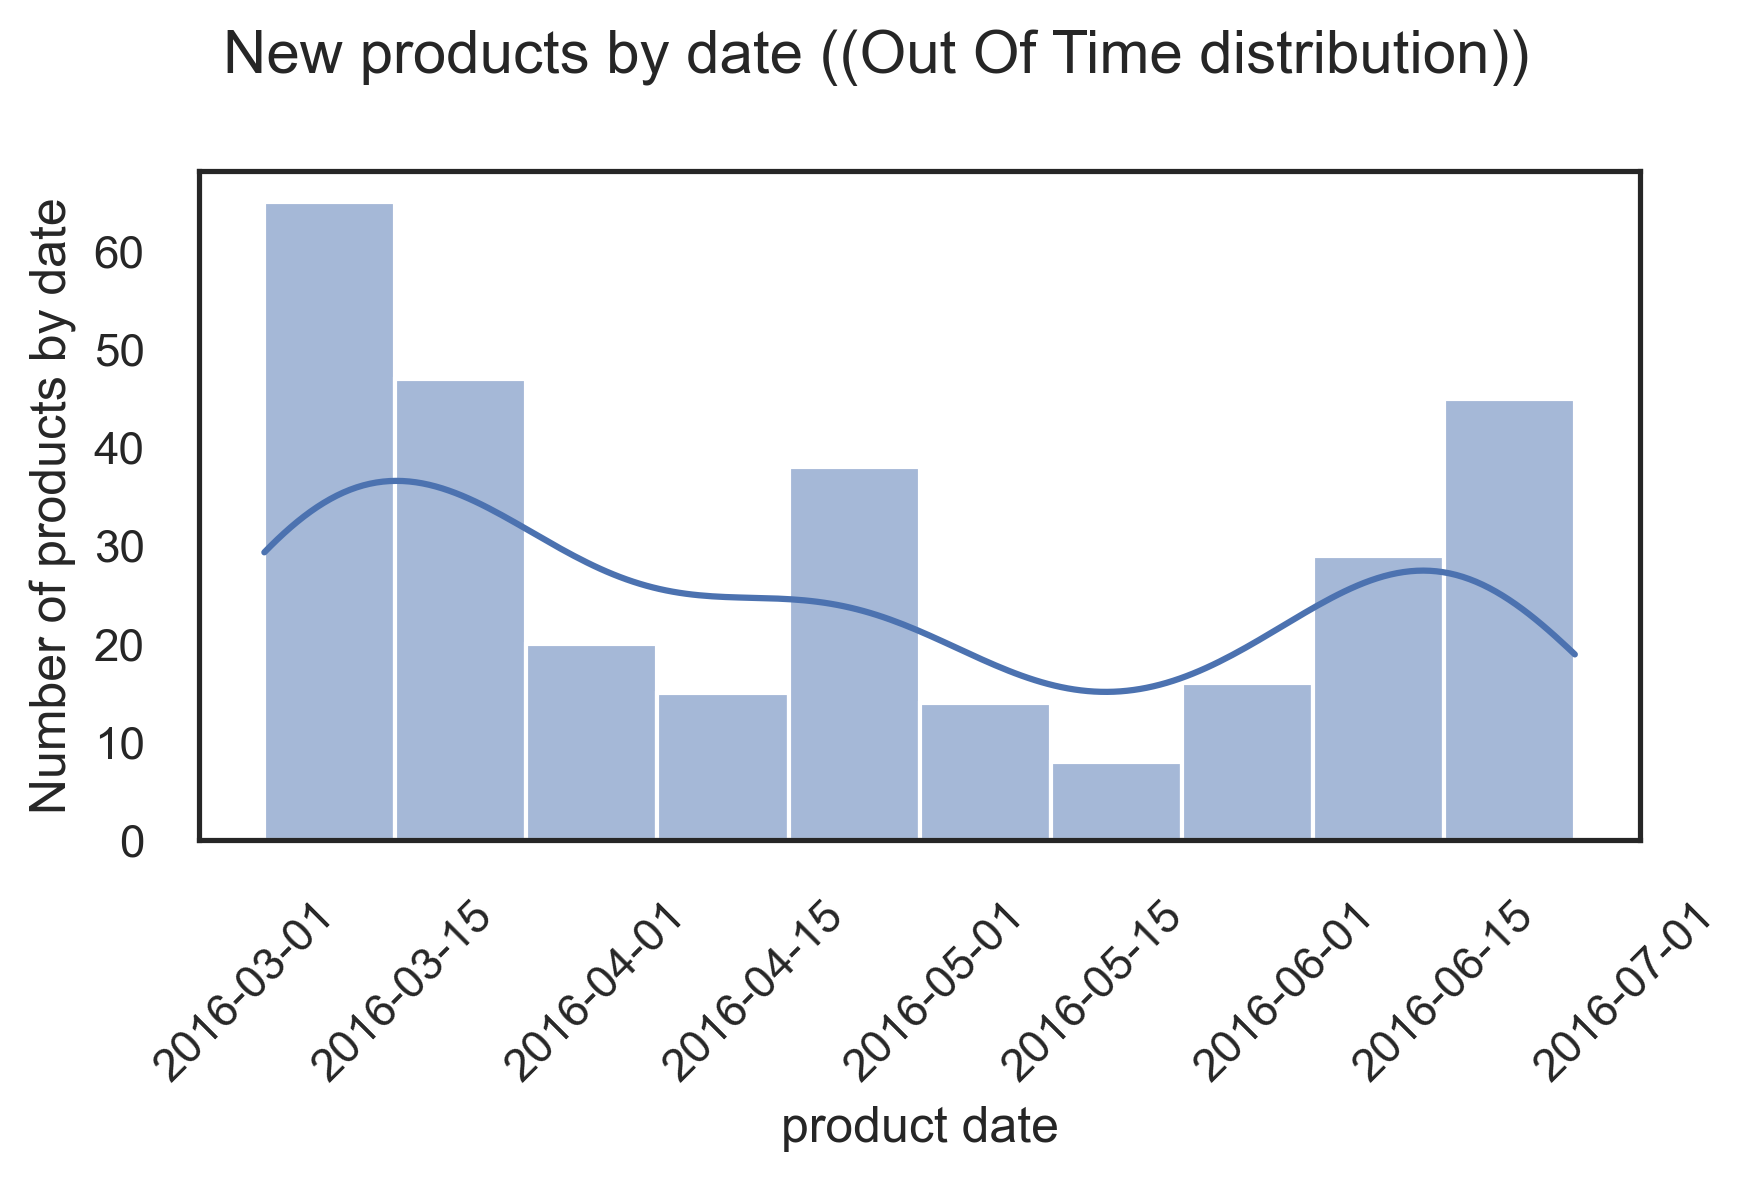

In [52]:
# Plot (with axes)
for variable in ['crawl_timestamp']:
    sns.set_theme(style="white")
    fig, ax = plt.subplots(1, 1, dpi=300, tight_layout=True)
    plot = sns.histplot(data=flipkart_dataset_oot, x=variable, kde=True)
    
     # figure title
    fig.suptitle(f'New products by date ((Out Of Time distribution))')
    
    # name of axes
    ax.set(xlabel= 'product date', ylabel='Number of products by date')
    
    # x-legend rolling
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    
# Sauvegarde
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\all\\whole_timeline_oot.png", transparent=True, dpi=300)
    

In [53]:
# filtering the out of time period
flipkart_dataset = flipkart_dataset[(flipkart_dataset['crawl_timestamp']<'2016-03-01')]
flipkart_dataset

uniq_id           crawl_timestamp  \
316  b551f20c6a8a1dc3d102a5f04bc8d7d6 2015-12-01 06:13:00+00:00   
333  d4b625befbbb7e8004e53c187f286e11 2015-12-01 06:13:00+00:00   
334  417ae3e8b08acc19a023b8a958644799 2015-12-01 06:13:00+00:00   
335  353ddb2c8ab6920d8ad1055abee87dda 2015-12-01 06:13:00+00:00   
336  6634de7b39a5b0658c74ab098450096d 2015-12-01 06:13:00+00:00   
..                                ...                       ...   
594  3589e80e8f7f3f3a5b65447389b90c2e 2016-02-25 09:50:31+00:00   
641  eaed0897074ee52230ff6c6d73c18dd4 2016-02-28 10:36:58+00:00   
642  4d638f7a608a76db27cd7bab13582a93 2016-02-28 10:36:58+00:00   
643  86a39f77de21aa9654e8ea03335244fc 2016-02-28 10:36:58+00:00   
640  6d460d2e12ff7c84cb6b9af783d465ae 2016-02-28 10:36:58+00:00   

                                           product_url  \
316  http://www.flipkart.com/wild-stone-smoke-juice...   
333  http://www.flipkart.com/binatone-wr3000n/p/itm...   
334  http://www.flipkart.com/kamasutra-combo-offer-...   
335  http://www.flipkart.com/tenda-a5/p/itmdp2cxeq6...   
336  http://www.flipkart.com/d-link-dir-816-wireles...   
..                                                 ...   
594  http://www.flipkart.com/miracle-retail-bonsai-...   
641  http://www.flipkart.com/thakkar-baby-girl-s-pr...   
642  http://www.flipkart.com/next-steps-baby-girl-s...   
643  http://www.flipkart.com/intel-3-2-ghz-lga-1150...   
640  http://www.flipkart.com/nammababy-baby-girl-s-...   

                                          product_name  \
316               Wild Stone Smoke And Juice Combo Set   
333                                   Binatone WR3000N   
334               Kamasutra Combo Offer Pack Combo Set   
335                                           Tenda A5   
336     D-Link DIR-816 Wireless AC750 Dual Band Router   
..                                                 ...   
594  Miracle Retail Bonsai Wild Plant Artificial Pl...   
641       Thakkar Baby Girl's Printed Top & Pyjama Set   
642    next steps Baby Girl's Striped Top & Pyjama Set   
643              Intel 3.2 GHz LGA 1150 3250 Processor   
640  NammaBaby Baby Girl's Animal Print Top & Pyjam...   

                                 product_category_tree               pid  \
316  ["Beauty and Personal Care >> Fragrances >> De...  CAGE6FZQ3XXVG4V5   
333  ["Computers >> Network Components >> Routers >...  RTRE2TYN2XUPCEVH   
334  ["Beauty and Personal Care >> Fragrances >> De...  CAGDYY25E8RVC7EG   
335  ["Computers >> Network Components >> Routers >...  RTRDNY65WHG9FHTS   
336  ["Computers >> Network Components >> Routers >...  RTRE3XW7JS6YJHG5   
..                                                 ...               ...   
594  ["Home Decor & Festive Needs >> Flowers, Plant...  ARPEFZT4FGYZZHAZ   
641  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG6X5BZEGXPZ2   
642  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG48NRGZZSGUH   
643  ["Computers >> Computer Components >> Processo...  PSREGFZ8MXRM6FFQ   
640  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTECQBQFGMTK9TE   

    retail_price discounted_price                                 image  \
316        360.0            327.0  b551f20c6a8a1dc3d102a5f04bc8d7d6.jpg   
333       2995.0           2500.0  d4b625befbbb7e8004e53c187f286e11.jpg   
334        380.0            358.0  417ae3e8b08acc19a023b8a958644799.jpg   
335       1999.0           1999.0  353ddb2c8ab6920d8ad1055abee87dda.jpg   
336       4200.0           2059.0  6634de7b39a5b0658c74ab098450096d.jpg   
..           ...              ...                                   ...   
594       1299.0            599.0  3589e80e8f7f3f3a5b65447389b90c2e.jpg   
641        500.0            399.0  eaed0897074ee52230ff6c6d73c18dd4.jpg   
642        529.0            309.0  4d638f7a608a76db27cd7bab13582a93.jpg   
643       6100.0           4500.0  86a39f77de21aa9654e8ea03335244fc.jpg   
640        499.0            455.0  6d460d2e12ff7c84cb6b9af783d465ae.jpg   

    is_FK_Advanta

In [54]:
# Check of the min date for the Out Of Time period
flipkart_dataset['crawl_timestamp'].min()

Timestamp('2015-12-01 06:13:00+0000', tz='UTC')

In [55]:
# Check of the max date for the Out Of Time period
flipkart_dataset['crawl_timestamp'].max()

Timestamp('2016-02-28 10:36:58+0000', tz='UTC')

C:\Users\vince\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\vince\AppData\Roaming\Python\Python38\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


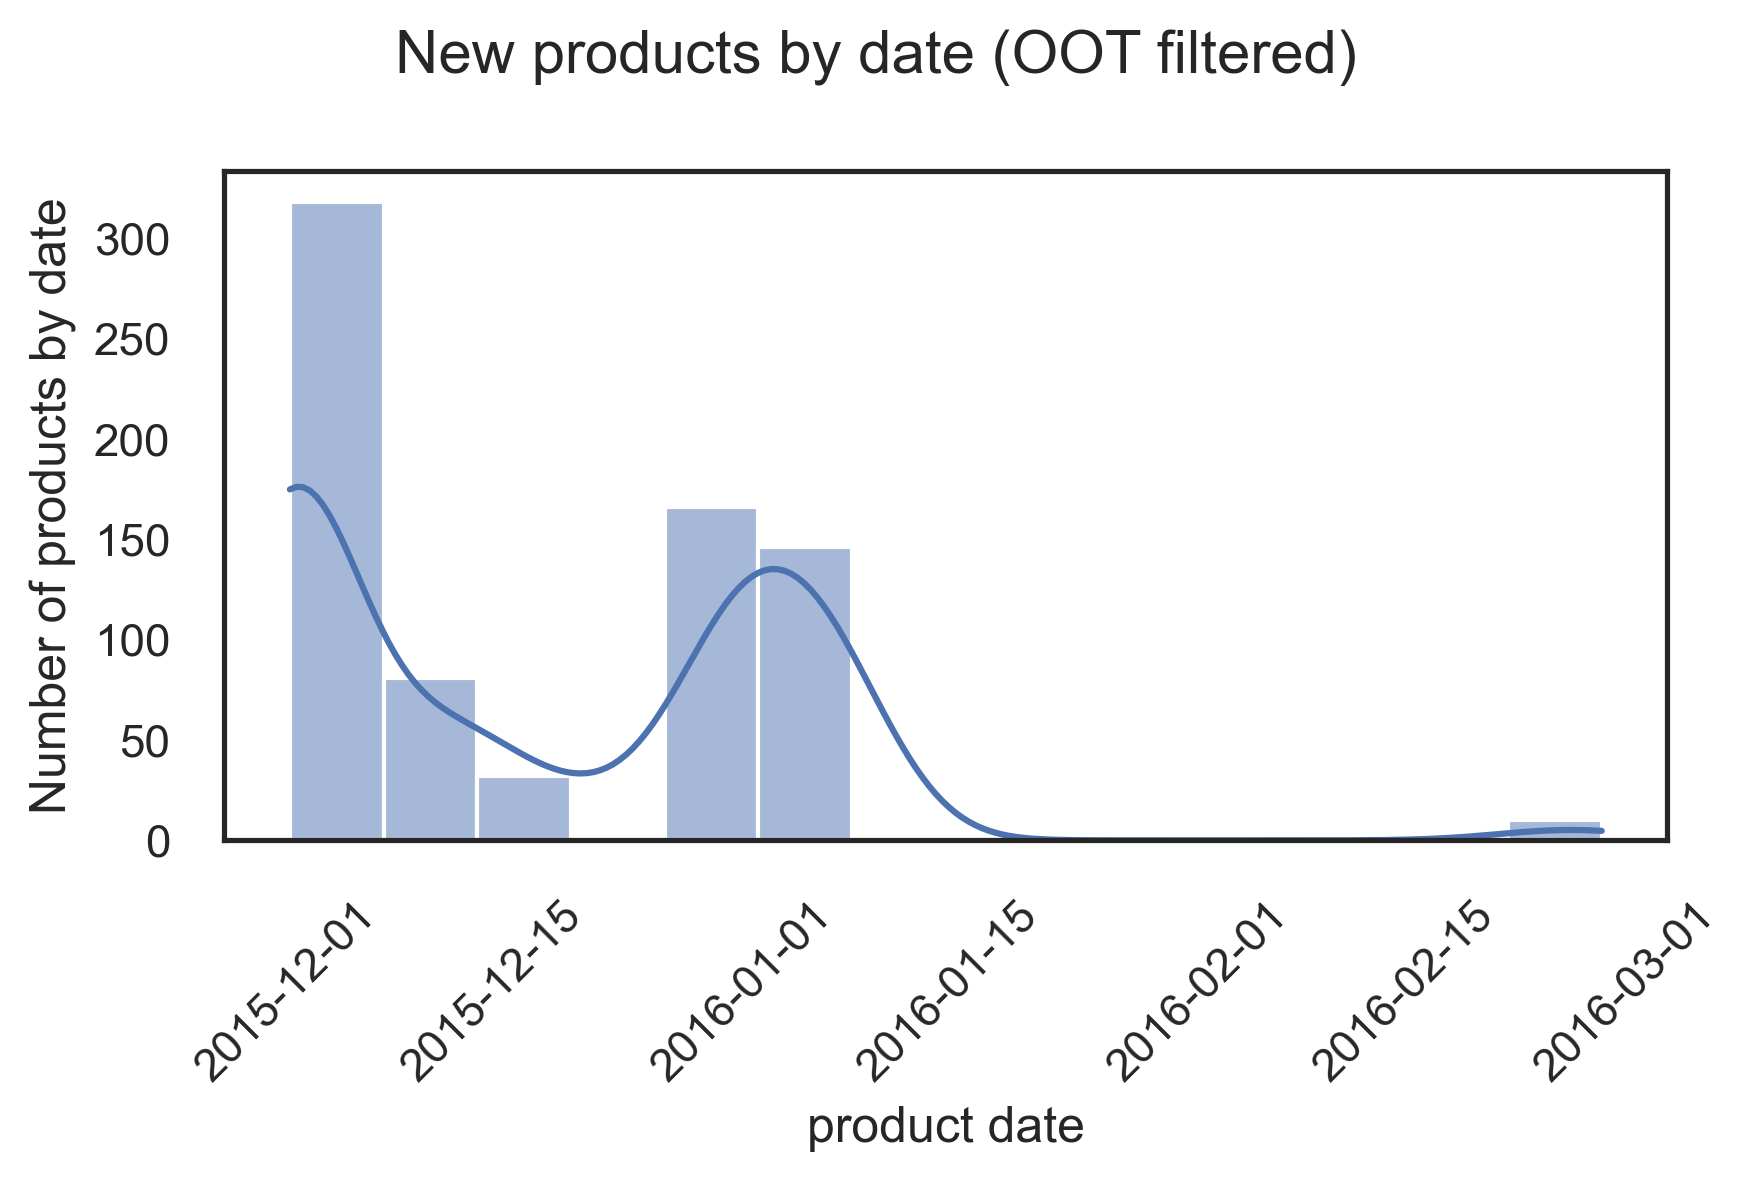

In [56]:
# Plot (with axes)
for variable in ['crawl_timestamp']:
    sns.set_theme(style="white")
    fig, ax = plt.subplots(1, 1, dpi=300, tight_layout=True)
    plot = sns.histplot(data=flipkart_dataset, x=variable, kde=True)
    
     # figure title
    fig.suptitle(f'New products by date (OOT filtered)')
    
    # name of axes
    ax.set(xlabel= 'product date', ylabel='Number of products by date')
    
    # x-legend rolling
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    
# Sauvegarde
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\all\\whole_timeline_oot_filtered.png", transparent=True, dpi=300)
    

In [57]:
## dataframe saving to csv
returnValue = flipkart_dataset.to_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\flipkart_dataset_modified_train.csv',sep = ',', index=False)
print(returnValue)

None


In [58]:
## dataframe saving to csv
returnValue = flipkart_dataset_oot.to_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\flipkart_dataset_modified_test.csv',sep = ',', index=False)
print(returnValue)

None


# TEXT VECTORIZATION - BAG OF WORDS

## Count vectorization

In [59]:
# init CountVectorizer
cv = CountVectorizer()

# fit and transform
X_countvect = cv.fit_transform(flipkart_dataset['processed_description'])
words_countvect = cv.get_feature_names()

## TF-IDF

In [60]:
# init TfidfVectorizer
tfidf_vect = TfidfVectorizer()

# fit and transform
X_tfidf = tfidf_vect.fit_transform(flipkart_dataset['processed_description'])
words_tfidf = tfidf_vect.get_feature_names()
print(X_tfidf.shape)
print(words_tfidf)

(753, 2469)
['aa', 'aapno', 'abide', 'ability', 'able', 'abroad', 'absorb', 'absorbency', 'absorbent', 'abstract', 'abstrcts', 'ac', 'accent', 'accessory', 'accord', 'acer', 'ache', 'acne', 'across', 'acrylic', 'act', 'active', 'actual', 'adaa', 'adapter', 'adaptor', 'add', 'addiction', 'addition', 'additional', 'adhesive', 'adi', 'adidas', 'adjust', 'adjustable', 'admiration', 'admire', 'adorable', 'adorn', 'adsl', 'aero', 'affect', 'affordable', 'afternoon', 'age', 'agrasen', 'agromech', 'air', 'airport', 'airtel', 'ajmal', 'akshaj', 'al', 'alarm', 'alarmhour', 'aleo', 'alfajr', 'allow', 'alloy', 'allure', 'almond', 'almost', 'aloe', 'aloevera', 'along', 'alpha', 'alphabet', 'alrams', 'also', 'alternatively', 'aluminium', 'always', 'amaze', 'amber', 'america', 'among', 'amount', 'amp', 'analog', 'analogdigital', 'analogue', 'analyzer', 'andre', 'andriod', 'android', 'angel', 'animal', 'anise', 'anjalika', 'anjeer', 'anna', 'anniversary', 'anodise', 'anodize', 'another', 'ant', 'anthe

# TEXT MODELLING (supervised)

In [61]:
flipkart_dataset['product_class_number'] = pd.to_numeric(flipkart_dataset['product_class_number'])

In [62]:
# define the target variable
y = flipkart_dataset['product_class_number'].values

In [63]:
# Dictionnary to collect the performance results
surpervised_train_model_results = {}

## Count vectorization

### TRAIN/VALIDATION SPLIT

In [64]:
# Split train / validation
X_train, X_val, y_train, y_val = \
	train_test_split(X_countvect, y,
                     test_size=0.3 # 30% of data for validation
                    , random_state=1)

#### Naive-Bayes classifier

In [65]:
# Declare the model
clf = MultinomialNB()

# Timer start
start_time = timeit.default_timer()

# Train the model
clf.fit(X_train, y_train)

# Make predictions 
y_val_predict = clf.predict(X_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['countvect_naive_bayes'] = [f1, elapsed, 'count_vectorization']

Weighted Precision: 0.86
Weighted Recall: 0.84
Weighted F1-score : 0.83; time: 0.00s


In [66]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.84


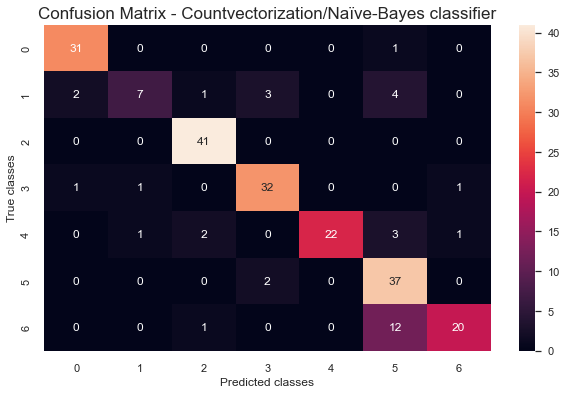

In [67]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Countvectorization/Naïve-Bayes classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_countvec_naive_bayes_classifier.png", transparent=True, dpi=300)

plt.show()

#### Random forest classifier

##### GridsearchCV

In [68]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12],
    #'max_features': [],
    'min_samples_leaf': [10, 100],
    #'min_samples_split': [],
    'n_estimators': [500, 1000, 1500]
}

# Create a based model
clf = RandomForestClassifier()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='weighted')

# Instantiate the grid search model
clf_gscv = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=f1_scorer) # n_jobs=-1 for parallelizing search

# Timer start
start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(X_train, y_train)

# Make predictions 
y_val_predict = clf_gscv.predict(X_val)

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['countvect_random_forest_GSCV'] = [f1, elapsed, 'count_vectorization']



Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:    8.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    8.8s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: DeprecationWarning: `np.int` is a deprecat

Weighted Precision: 0.76
Weighted Recall: 0.79
Weighted F1-score : 0.77; time: 0.00s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [69]:
# Best params of the cross validation gridsearch
clf_gscv.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'min_samples_leaf': 10,
 'n_estimators': 1000}

In [70]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.79


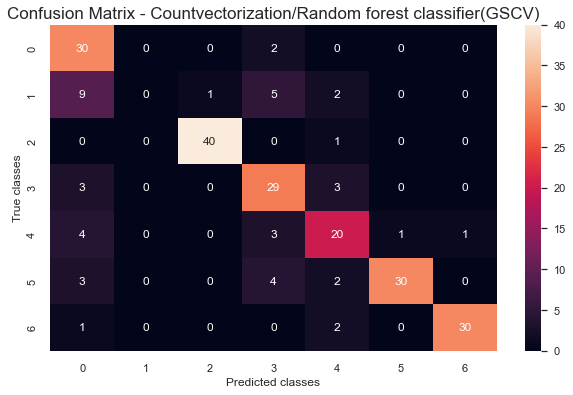

In [71]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Countvectorization/Random forest classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_countvect_random_forest_classifier(GSCV).png", transparent=True, dpi=300)

plt.show()

#### SVM classifier

In [72]:
# Declare the model
svm_clf = LinearSVC()

# Timer start
start_time = timeit.default_timer()

# Train the model
svm_clf.fit(X_train, y_train)

# Make predictions 
y_val_predict = svm_clf.predict(X_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['countvect_SVM'] = [f1, elapsed , "count_vectorization"]

Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score : 0.94; time: 0.01s


In [73]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.94


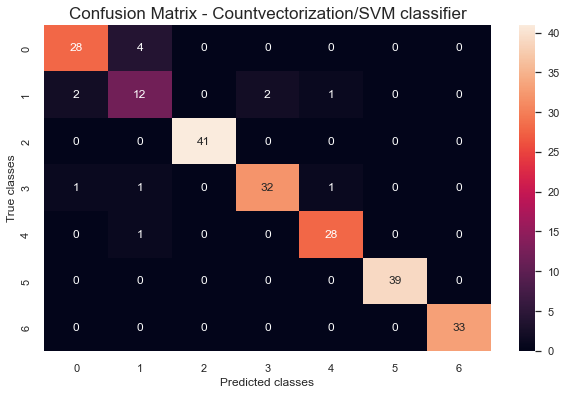

In [74]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Countvectorization/SVM classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_countvec_SVM_classifier.png", transparent=True, dpi=300)

plt.show()

##### GridsearchCV

In [75]:
# GridsearchCV

parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': ['scale', 'auto']}

# Declare the model
clf = SVC()

# Instantiate the grid search model
clf_gscv = GridSearchCV(clf, parameters, cv = 3, refit = True, verbose = 1)

# Timer start
start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(X_train, y_train)

# Make predictions 
y_val_predict = clf_gscv.predict(X_val)

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['countvect_SVM_GSCV'] = [f1, elapsed, 'count_vectorization']

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Weighted Precision: 0.94
Weighted Recall: 0.94
Weighted F1-score : 0.94; time: 0.01s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    3.7s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [76]:
clf_gscv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [77]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.94


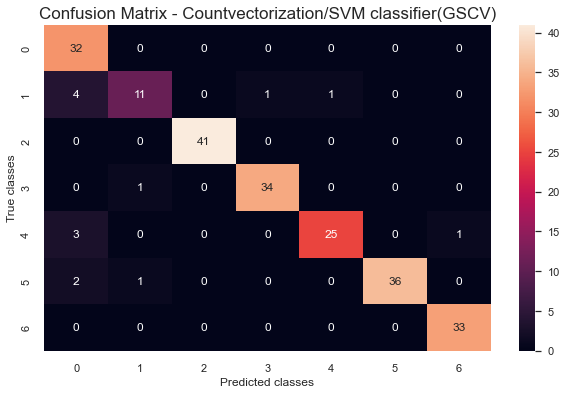

In [78]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Countvectorization/SVM classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_countvec_SVM_classifier_gridsearchcv.png", transparent=True, dpi=300)

plt.show()

## TF-IDF

### TRAIN/VALIDATION SPLIT

In [79]:
# Split train / validation
X2_train, X2_val, y2_train, y2_val = \
	train_test_split(X_tfidf, y,
                     test_size=0.3 # 30% of data for validation
                    , random_state=1)

#### Naive-Bayes classifier

In [80]:
# Declare the model
clf = MultinomialNB()

# Timer start
start_time = timeit.default_timer()

# Train the model
clf.fit(X2_train, y2_train)

# Make predictions 
y2_val_predict = clf.predict(X2_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y2_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y2_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['tfidf_naive_bayes'] = [f1, elapsed, 'tfidf']

Weighted Precision: 0.86
Weighted Recall: 0.88
Weighted F1-score : 0.85; time: 0.00s


In [81]:
# Accuracy score 
accuracy = round(accuracy_score(y2_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.88


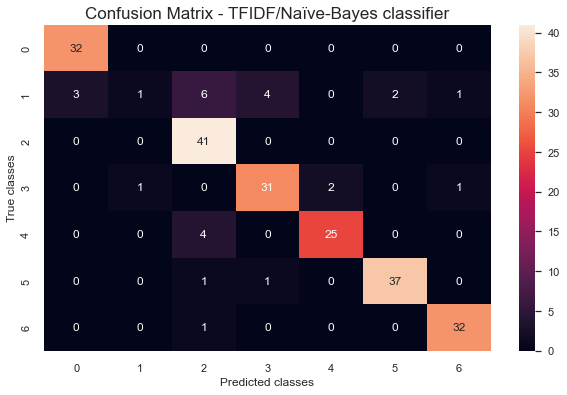

In [82]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y2_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - TFIDF/Naïve-Bayes classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_tfidf_naive_bayes_classifier.png", transparent=True, dpi=300)

plt.show()

#### Random forest classifier

##### GridsearchCV

In [83]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12],
    #'max_features': [],
    'min_samples_leaf': [10, 100],
    #'min_samples_split': [],
    'n_estimators': [500, 1000, 1500]
}

# Create a based model
clf = RandomForestClassifier()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='weighted')

# Instantiate the grid search model
clf_gscv = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=f1_scorer) # n_jobs=-1 for parallelizing search

# Timer start
start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(X2_train, y2_train)

# Make predictions 
y2_val_predict = clf_gscv.predict(X2_val)

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y2_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y2_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['tfidf_random_forest_GSCV'] = [f1, elapsed, 'tfidf']



Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:    5.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:    5.8s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: DeprecationWarning: `np.int` is a deprecat

Weighted Precision: 0.77
Weighted Recall: 0.80
Weighted F1-score : 0.77; time: 0.00s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\tree\_classes.py:190: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [84]:
clf_gscv.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'min_samples_leaf': 10,
 'n_estimators': 500}

In [85]:
# 3. Make predictions 
y2_val_predict = clf_gscv.predict(X2_val)

# 4. accuracy score
print("Accuracy: ", accuracy_score(y2_val, y2_val_predict))

C:\Users\vince\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:183: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


Accuracy:  0.8008849557522124


In [86]:
# Performance
print('Weighted Precision: {:.2f}'.format(precision_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y2_val, y2_val_predict, average='weighted')))

Weighted Precision: 0.77
Weighted Recall: 0.80
Weighted F1-score: 0.77


In [87]:
# Accuracy score 
accuracy = round(accuracy_score(y2_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.80


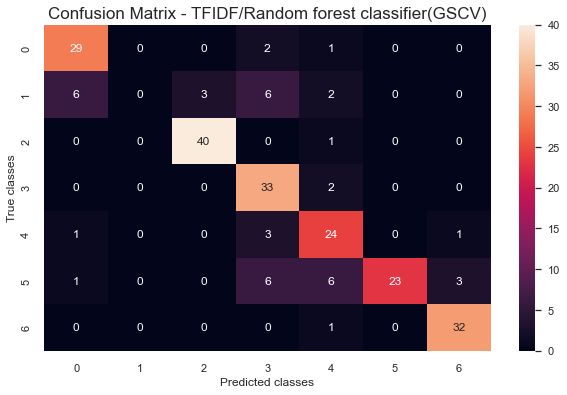

In [88]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# Confusion matrix
sns.heatmap(confusion_matrix(y2_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - TFIDF/Random forest classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_tfidf_random_forest_classifier(GSCV).png", transparent=True, dpi=300)

plt.show()

#### SVM classifier

In [89]:
# Declare the model
clf = LinearSVC()

# Timer start
start_time = timeit.default_timer()

# Train the model
clf.fit(X2_train, y2_train)

# Make predictions 
y2_val_predict = clf.predict(X2_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y2_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y2_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['tfidf_SVM'] = [f1, elapsed , "tfidf"]

Weighted Precision: 0.93
Weighted Recall: 0.93
Weighted F1-score : 0.93; time: 0.01s


In [90]:
# Accuracy score 
accuracy = round(accuracy_score(y2_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.93


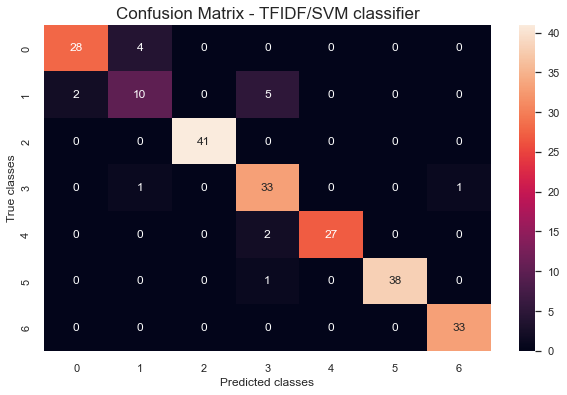

In [91]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y2_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - TFIDF/SVM classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_tfidf_SVM_classifier.png", transparent=True, dpi=300)
plt.show()

##### GridsearchCV

In [92]:
# GridsearchCV

parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': ['scale', 'auto']}

# Declare the model
clf = SVC()

# Instantiate the grid search model
clf_gscv = GridSearchCV(clf, parameters, cv = 3, refit = True, verbose = 1)

# Timer start
start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(X2_train, y2_train)

# Make predictions 
y2_val_predict = clf_gscv.predict(X2_val)

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y2_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y2_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y2_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))
surpervised_train_model_results['tfidf_SVM_GSCV'] = [f1, elapsed, 'tfidf']

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score : 0.92; time: 0.01s


[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    4.2s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


In [93]:
clf_gscv.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}

In [94]:
# Accuracy score 
accuracy = round(accuracy_score(y2_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.92


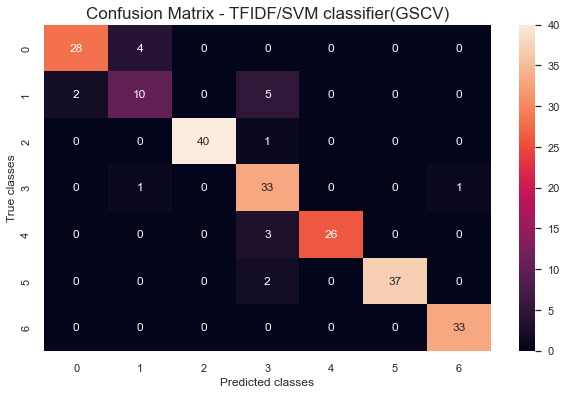

In [95]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y2_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - TFIDF/SVM classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\confusion_matrix_tfidf_SVM_classifier_gridsearchcv.png", transparent=True, dpi=300)

plt.show()

## Results

In [96]:
# Results
surpervised_train_model_results

{'countvect_naive_bayes': [0.83407386913502,
  0.0018852000000002533,
  'count_vectorization'],
 'countvect_random_forest_GSCV': [0.7675547059721525,
  0.0018852000000002533,
  'count_vectorization'],
 'countvect_SVM': [0.9428795537448801,
  0.0137400999999997,
  'count_vectorization'],
 'countvect_SVM_GSCV': [0.9373122134399032,
  0.0137400999999997,
  'count_vectorization'],
 'tfidf_naive_bayes': [0.8544301805060721, 0.001865000000002226, 'tfidf'],
 'tfidf_random_forest_GSCV': [0.7688395087369149,
  0.001865000000002226,
  'tfidf'],
 'tfidf_SVM': [0.9287089271810455, 0.0057910000000021, 'tfidf'],
 'tfidf_SVM_GSCV': [0.9166455221740472, 0.0057910000000021, 'tfidf']}

In [97]:
# dataframe results:
surpervised_train_model_results_df = pd.DataFrame(list(surpervised_train_model_results.items()),
                   columns=['model', '[f1_score(weighted), computing_time, bag_of_words]'])

In [98]:
# Dataframe columns
surpervised_train_model_results_df['f1_score(weighted)'] = surpervised_train_model_results_df['[f1_score(weighted), computing_time, bag_of_words]'].apply(lambda x: round(x[0],2))
surpervised_train_model_results_df['computing_time(s)'] = surpervised_train_model_results_df['[f1_score(weighted), computing_time, bag_of_words]'].apply(lambda x: round(x[1],2))
surpervised_train_model_results_df['bag_of_words'] = surpervised_train_model_results_df['[f1_score(weighted), computing_time, bag_of_words]'].apply(lambda x: x[2])
surpervised_train_model_results_df.drop('[f1_score(weighted), computing_time, bag_of_words]',axis=1, inplace=True)

# Sorting values
surpervised_train_model_results_df.sort_values(by=['f1_score(weighted)'], ascending= False,
                                               inplace = True)
surpervised_train_model_results_df

model  f1_score(weighted)  computing_time(s)  \
2                 countvect_SVM                0.94               0.01   
3            countvect_SVM_GSCV                0.94               0.01   
6                     tfidf_SVM                0.93               0.01   
7                tfidf_SVM_GSCV                0.92               0.01   
4             tfidf_naive_bayes                0.85               0.00   
0         countvect_naive_bayes                0.83               0.00   
1  countvect_random_forest_GSCV                0.77               0.00   
5      tfidf_random_forest_GSCV                0.77               0.00   

          bag_of_words  
2  count_vectorization  
3  count_vectorization  
6                tfidf  
7                tfidf  
4                tfidf  
0  count_vectorization  
1  count_vectorization  
5                tfidf

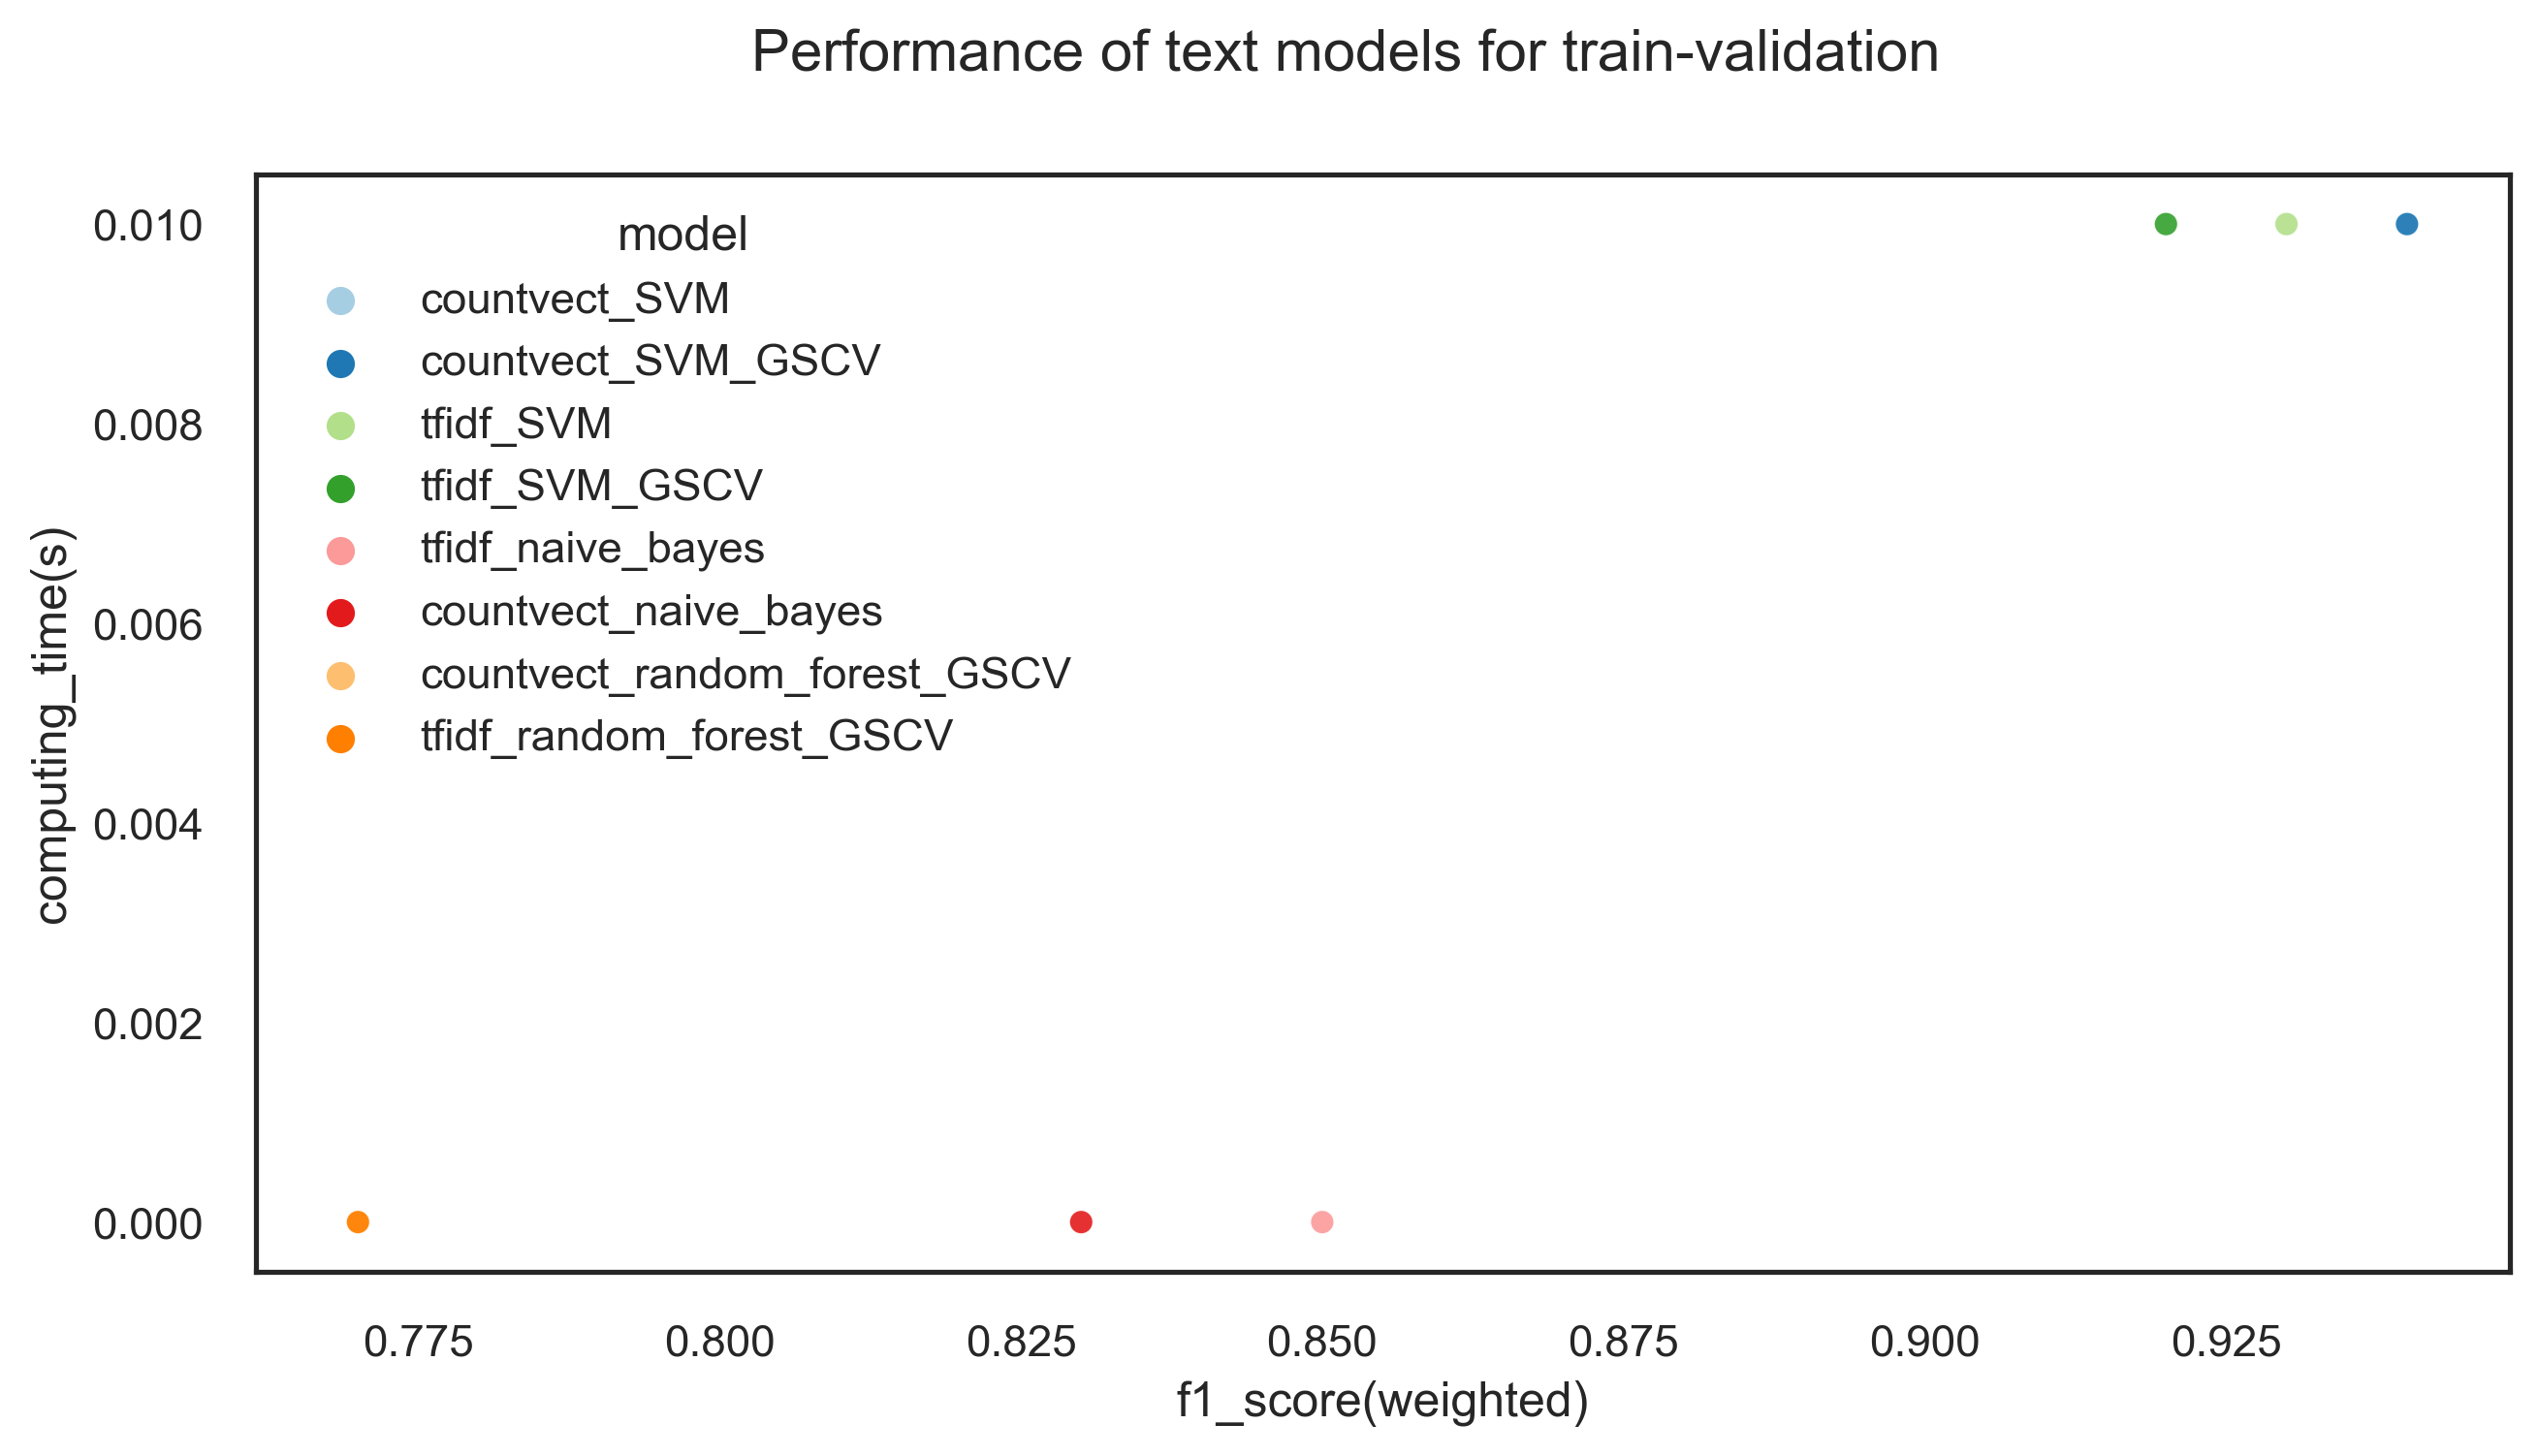

In [99]:
# plot of results

# Palette definition
my_pal = sns.color_palette("Paired", n_colors = surpervised_train_model_results_df.shape[0])

# Fif, ax:

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=300)

# Scatter plot
sns.scatterplot(data=surpervised_train_model_results_df, x="f1_score(weighted)",
                y="computing_time(s)", hue=surpervised_train_model_results_df.model, 
                palette=my_pal, 
                legend='full',
               alpha=0.9)

# Figure tittle
fig.suptitle('Performance of text models for train-validation')

# Legend size and position
# plt.legend(loc=2, prop={'size': 6})

# Figure saving
fig.savefig("projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\supervised\\train_val\\model_results\\Performance of text models for train-validation.png", transparent=True, dpi=300)

# TEXT MODELLING (unsupervised)

In [100]:
# Maximum number of topics 
kmax = 10

## Doc2bow pre-process

In [101]:
# Creation of documents (a serie of lists of words)
flipkart_dataset['processed_description_list'] = flipkart_dataset['processed_description'].apply(lambda x: list(x.split(" ")))
flipkart_dataset['processed_description_list']

316    [flipkartcom, buy, wild, stone, smoke, juice, ...
333    [buy, binatone, r, flipkartcom, genuine, produ...
334    [flipkartcom, buy, kamasutra, combo, offer, pa...
335    [buy, tenda, r, flipkartcom, genuine, product,...
336    [buy, dlink, wireless, dual, band, router, r, ...
                             ...                        
594    [key, feature, miracle, retail, bonsai, wild, ...
641    [specification, thakkar, baby, girl, print, to...
642    [specification, next, step, baby, girl, strip,...
643    [specification, intel, ghz, lga, processor, bl...
640    [specification, nammababy, baby, girl, animal,...
Name: processed_description_list, Length: 753, dtype: object

In [102]:
# define the function to create dictionary and document to term matrix
def create_dic_and_docterm_matrix(Complete_Content):
    """
    This function will create corpus dictionary and document to term matrix
    
    Argument:
        X: tokenized text corpus
        dict_file_path: file path to save dictionary
        matrix_file_path: file path to save matrix
    returns:
        corpus dictionary and document to term matrix
    """   
    
    # Create Dictionary
    id2word_dic = Dictionary(Complete_Content)
 
    # Create Corpus
    text = Complete_Content 
    
    # Document to term Frequency
    doc_term_matrix = [id2word_dic.doc2bow(tokens) for tokens in text]

    return id2word_dic, doc_term_matrix
    

In [103]:
# create dictionary and document to term matrix
dictionary, doc_term_matrix  = create_dic_and_docterm_matrix(flipkart_dataset['processed_description_list'])

### LDA

In [104]:
# Train LDA on different values of k
for k in range(2,kmax): 
    print('Round: '+str(k))
    LDA = ldamulticore.LdaMulticore
    ldamodel = LDA(doc_term_matrix, num_topics=k, id2word=dictionary, passes=20, iterations=100,
                   chunksize=10000, eval_every=10, random_state=20)
    
    # Save the model configuration
    ldamodel.save(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\text\\ldamodel_for_{k}topics")
    
    

Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9


In [105]:
# Calculate the coherence score for each value of k

lda_coherence_scores = []

for k in range(2,kmax):
    # Run the coherence model to get the score for each model
    ldamodel = LDA.load(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\text\\ldamodel_for_{k}topics")
    lda_cm =  coherencemodel.CoherenceModel(
        model=ldamodel,
        texts=flipkart_dataset['processed_description_list'],
        dictionary=dictionary,
        coherence='c_v'
    )
    
    lda_coherence_scores.append((k, 'default', 'default', round(lda_cm.get_coherence(), 5)))
    

In [106]:
# Create a dataframe after collection of (k, coherence_score)
pd.DataFrame(lda_coherence_scores, columns=['LDA_model','alpha','eta','coherence_score']).to_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_coherence_matrix.csv', index=False)

lda_mat = pd.read_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_coherence_matrix.csv')
lda_mat

LDA_model    alpha      eta  coherence_score
0          2  default  default          0.52411
1          3  default  default          0.43646
2          4  default  default          0.54881
3          5  default  default          0.46476
4          6  default  default          0.53441
5          7  default  default          0.50548
6          8  default  default          0.50132
7          9  default  default          0.49030

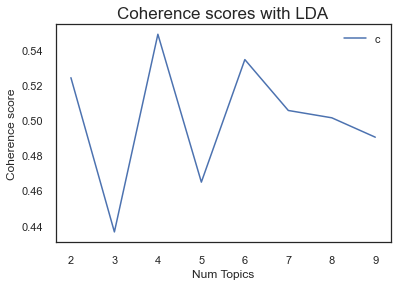

In [107]:
# Show graph of coherence values depending on k
x = range(2,kmax)
plt.plot(x, lda_mat['coherence_score'])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence scores with LDA', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_coherence.png", transparent=True, dpi=300)

In [108]:
# Sorted values
lda_mat_sorted = lda_mat.sort_values(by=['coherence_score'])
lda_mat_sorted

LDA_model    alpha      eta  coherence_score
1          3  default  default          0.43646
3          5  default  default          0.46476
7          9  default  default          0.49030
6          8  default  default          0.50132
5          7  default  default          0.50548
0          2  default  default          0.52411
4          6  default  default          0.53441
2          4  default  default          0.54881

In [109]:
# k with the minimum coherence score
lda_best_num_topics = lda_mat_sorted['LDA_model'].iloc[0]
lda_best_num_topics

3

In [110]:
# Loading the final model
lda_choice = ldamodel.load(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\text\\ldamodel_for_{lda_best_num_topics}topics")

In [111]:
# Topics
lda_choice_topics = lda_choice.show_topics(num_words=20)
lda_choice_topics

[(0,
  '0.037*"free" + 0.037*"buy" + 0.036*"delivery" + 0.036*"ship" + 0.036*"genuine" + 0.036*"cash" + 0.035*"product" + 0.031*"day" + 0.031*"guarantee" + 0.030*"flipkartcom" + 0.030*"replacement" + 0.025*"online" + 0.020*"watch" + 0.019*"mug" + 0.018*"r" + 0.015*"analog" + 0.013*"price" + 0.011*"best" + 0.010*"great" + 0.010*"india"'),
 (1,
  '0.013*"make" + 0.012*"design" + 0.011*"price" + 0.011*"battery" + 0.011*"quality" + 0.011*"product" + 0.010*"light" + 0.010*"r" + 0.010*"usb" + 0.009*"size" + 0.008*"come" + 0.008*"high" + 0.008*"ceramic" + 0.008*"rockmantra" + 0.007*"mug" + 0.007*"perfect" + 0.007*"fresh" + 0.007*"craft" + 0.007*"material" + 0.007*"specification"'),
 (2,
  '0.014*"price" + 0.013*"towel" + 0.013*"cm" + 0.011*"r" + 0.010*"cotton" + 0.009*"home" + 0.009*"make" + 0.008*"product" + 0.007*"showpiece" + 0.006*"set" + 0.006*"brass" + 0.006*"wall" + 0.006*"bath" + 0.006*"baby" + 0.005*"inch" + 0.005*"pack" + 0.005*"sticker" + 0.005*"quality" + 0.005*"hand" + 0.005*"siz

In [112]:
# Cleaned topics
for index, topic in lda_choice.show_topics(formatted=False, num_words= 20):
    print('Topic: {} \nWords: {}'.format(index+1, [w[0] for w in topic]))
    print("\n")

Topic: 1 
Words: ['free', 'buy', 'delivery', 'ship', 'genuine', 'cash', 'product', 'day', 'guarantee', 'flipkartcom', 'replacement', 'online', 'watch', 'mug', 'r', 'analog', 'price', 'best', 'great', 'india']


Topic: 2 
Words: ['make', 'design', 'price', 'battery', 'quality', 'product', 'light', 'r', 'usb', 'size', 'come', 'high', 'ceramic', 'rockmantra', 'mug', 'perfect', 'fresh', 'craft', 'material', 'specification']


Topic: 3 
Words: ['price', 'towel', 'cm', 'r', 'cotton', 'home', 'make', 'product', 'showpiece', 'set', 'brass', 'wall', 'bath', 'baby', 'inch', 'pack', 'sticker', 'quality', 'hand', 'size']




In [113]:
# Topic clustering
lda_choice_display = gensimvis.prepare(lda_choice, doc_term_matrix, dictionary)
pyLDAvis.save_html(lda_choice_display,f'projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\pyLDAvis_{lda_best_num_topics}_topics.html')
vis_path = os.path.realpath(f'projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\pyLDAvis_{lda_best_num_topics}_topics.html')
webbrowser.open('file://{}'.format(vis_path), new=2)


C:\Users\vince\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


True

#### Embedded representation of each topic

In [114]:
# Word2vec instance
flipkart2vec = Word2Vec(
            flipkart_dataset['processed_description_list'],
            min_count=3,   # Ignore words that appear less than this
            sg = 1,        # skipgrams
            window=7,      # Context window for words during training
            )       


In [115]:
# One example of similar words
flipkart2vec.wv.most_similar(positive=["buy"])

[('online', 0.9542309045791626),
 ('flipkartcom', 0.9284919500350952),
 ('couple', 0.9180720448493958),
 ('india', 0.9154286980628967),
 ('marvel', 0.911034345626831),
 ('blue', 0.908894419670105),
 ('luba', 0.9012854099273682),
 ('apple', 0.8997995257377625),
 ('analog', 0.8988282680511475),
 ('spethnic', 0.8982482552528381)]

In [116]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 100 to 13 dimensions with PCA
    reduc = PCA(n_components=13).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
    
    #dataframe filtering
    df1 = df[df['color']=='red']
    df2 = df[df['color']=='green']
    df3 = df[df['color']=='blue']
    
    #using existing points to put in the legend
    dot1=p1.scatter(df1["x"].iloc[0],df1["y"].iloc[0], marker=".", edgecolors='red', linewidths=3)
    dot2=p1.scatter(df2["x"].iloc[0],df2["y"].iloc[0], marker=".", edgecolors='green', linewidths=3)
    dot3=p1.scatter(df3["x"].iloc[0],df3["y"].iloc[0], marker=".", edgecolors='blue', linewidths=3)
   
    p1.legend(
    (dot1,dot2,dot3),
        ('target word','topic words','similar words'),
        loc='upper right')
            

C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\si

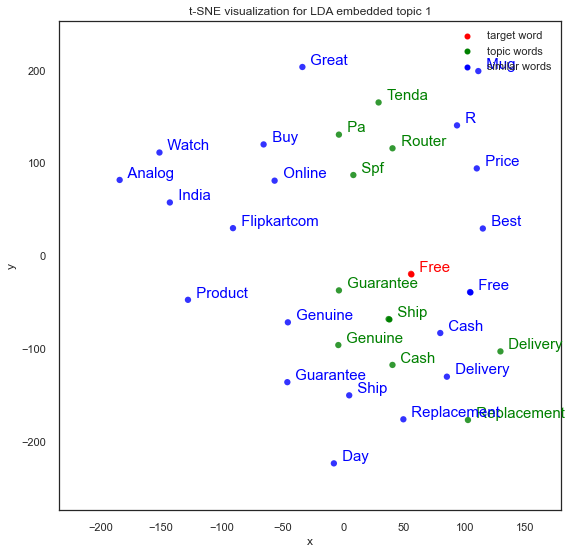

In [117]:
# embedded LDA topic 01 - T-SNE
lda_topic_01 = ['free', 'buy', 'delivery', 'ship', 'genuine', 'cash', 'product', 'day', 'guarantee', 'flipkartcom', 'replacement', 'online', 'watch', 'mug', 'r', 'analog', 'price', 'best', 'great', 'india']

tsnescatterplot(flipkart2vec, 'free', lda_topic_01)

# title
plt.title('t-SNE visualization for LDA embedded topic 1')

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_embedded_topic_01.png", transparent=True, dpi=300)


C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\si

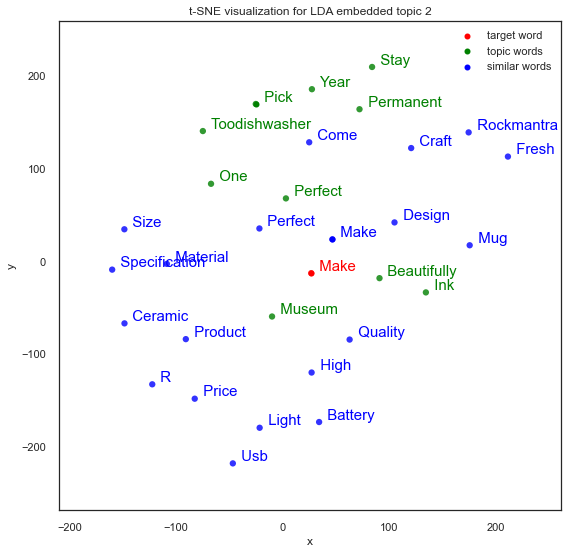

In [118]:
# embedded LDA topic 02 - T-SNE

lda_topic_02 = ['make', 'design', 'price', 'battery', 'quality', 'product', 'light', 'r', 'usb', 'size', 'come', 'high', 'ceramic', 'rockmantra', 'mug', 'perfect', 'fresh', 'craft', 'material', 'specification']

tsnescatterplot(flipkart2vec, 'make', lda_topic_02)

# title
plt.title('t-SNE visualization for LDA embedded topic 2')

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_embedded_topic_02.png", transparent=True, dpi=300)

C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\si

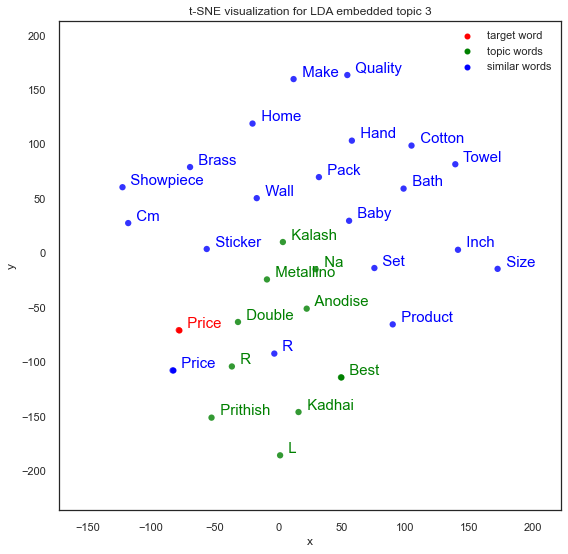

In [119]:
# embedded LDA topic 03 - T-SNE

lda_topic_03 = ['price', 'towel', 'cm', 'r', 'cotton', 'home', 'make', 'product', 'showpiece', 'set', 'brass', 'wall', 'bath', 'baby', 'inch', 'pack', 'sticker', 'quality', 'hand', 'size']

tsnescatterplot(flipkart2vec, 'price', lda_topic_03)

# title
plt.title('t-SNE visualization for LDA embedded topic 3')

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\lda\\lda_embedded_topic_03.png", transparent=True, dpi=300)

### NMF

In [120]:
# Run the nmf model and calculate the coherence score on different values of k

nmf_coherence_scores = []

for k in range(2,kmax): # Train different values of k
    print('Round: '+str(k))
    nmf = Nmf(
        corpus=doc_term_matrix,
        num_topics=k,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Calculate the coherence score for each value of k
    nmf_cm =  coherencemodel.CoherenceModel(
        model=nmf,
        texts=flipkart_dataset['processed_description_list'],
        dictionary=dictionary,
        coherence='c_v'
    )
    
    nmf_coherence_scores.append((k, 'default', 'default', round(nmf_cm.get_coherence(), 5)))
    

Round: 2
Round: 3
Round: 4
Round: 5
Round: 6
Round: 7
Round: 8
Round: 9


In [121]:
# Create a dataframe after collection of (k, coherence_score)
pd.DataFrame(nmf_coherence_scores, columns=['nmf_model','alpha','eta','coherence_score']).to_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\nmf\\nmf_coherence_matrix.csv', index=False)
nmf_mat = pd.read_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\nmf\\nmf_coherence_matrix.csv')
nmf_mat

nmf_model    alpha      eta  coherence_score
0          2  default  default          0.59808
1          3  default  default          0.64611
2          4  default  default          0.54983
3          5  default  default          0.67927
4          6  default  default          0.72829
5          7  default  default          0.68099
6          8  default  default          0.73307
7          9  default  default          0.61736

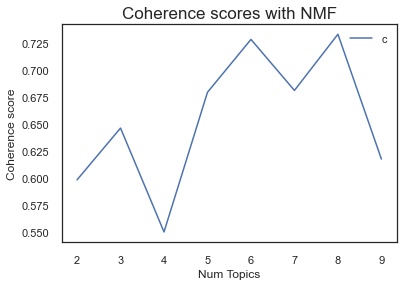

In [122]:
# Show graph of coherence values depending on k
x = range(2,kmax)
plt.plot(x, nmf_mat['coherence_score'])
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.title('Coherence scores with NMF', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\text\\unsupervised\\nmf\\nmf_coherence.png", transparent=True, dpi=300)

In [123]:
# Sorted values
nmf_mat_sorted = nmf_mat.sort_values(by=['coherence_score'])
nmf_mat_sorted

nmf_model    alpha      eta  coherence_score
2          4  default  default          0.54983
0          2  default  default          0.59808
7          9  default  default          0.61736
1          3  default  default          0.64611
3          5  default  default          0.67927
5          7  default  default          0.68099
4          6  default  default          0.72829
6          8  default  default          0.73307

In [124]:
# k with the minimum coherence score
nmf_best_num_topics = nmf_mat_sorted['nmf_model'].iloc[0]

In [125]:
# NMF instance with the best topic number
nmf_choice = Nmf(
        corpus=doc_term_matrix,
        num_topics=nmf_best_num_topics,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )

In [126]:
# Loading the final model
nmf_choice_topics = nmf_choice.show_topics(num_words=20)
nmf_choice_topics

[(0,
  '0.019*"home" + 0.013*"use" + 0.012*"mug" + 0.012*"make" + 0.011*"look" + 0.010*"also" + 0.010*"coffee" + 0.009*"towel" + 0.009*"wall" + 0.009*"price" + 0.008*"one" + 0.008*"r" + 0.008*"perfect" + 0.008*"light" + 0.007*"add" + 0.007*"printland" + 0.007*"cm" + 0.006*"stylish" + 0.006*"apply" + 0.006*"color"'),
 (1,
  '0.069*"mug" + 0.032*"gift" + 0.032*"ceramic" + 0.031*"perfect" + 0.030*"design" + 0.026*"love" + 0.023*"give" + 0.021*"make" + 0.019*"rockmantra" + 0.018*"one" + 0.017*"material" + 0.016*"come" + 0.016*"price" + 0.015*"x" + 0.015*"fresh" + 0.015*"craft" + 0.015*"specification" + 0.015*"r" + 0.014*"size" + 0.014*"feature"'),
 (2,
  '0.045*"product" + 0.041*"free" + 0.040*"buy" + 0.039*"ship" + 0.039*"genuine" + 0.039*"delivery" + 0.039*"cash" + 0.036*"replacement" + 0.034*"guarantee" + 0.033*"flipkartcom" + 0.032*"day" + 0.029*"online" + 0.029*"watch" + 0.020*"analog" + 0.014*"r" + 0.014*"men" + 0.013*"price" + 0.013*"best" + 0.013*"india" + 0.011*"discount"'),
 (3,


In [127]:
# Cleaned Topics
for index, topic in nmf_choice.show_topics(formatted=False, num_words= 20):
    print('Topic: {} \nWords: {}'.format(index+1, [w[0] for w in topic]))
    print("\n")

Topic: 1 
Words: ['home', 'use', 'mug', 'make', 'look', 'also', 'coffee', 'towel', 'wall', 'price', 'one', 'r', 'perfect', 'light', 'add', 'printland', 'cm', 'stylish', 'apply', 'color']


Topic: 2 
Words: ['mug', 'gift', 'ceramic', 'perfect', 'design', 'love', 'give', 'make', 'rockmantra', 'one', 'material', 'come', 'price', 'x', 'fresh', 'craft', 'specification', 'r', 'size', 'feature']


Topic: 3 
Words: ['product', 'free', 'buy', 'ship', 'genuine', 'delivery', 'cash', 'replacement', 'guarantee', 'flipkartcom', 'day', 'online', 'watch', 'analog', 'r', 'men', 'price', 'best', 'india', 'discount']


Topic: 4 
Words: ['quality', 'battery', 'high', 'mug', 'pizza', 'bring', 'like', 'lapguard', 'laptop', 'cutter', 'make', 'design', 'pas', 'also', 'include', 'great', 'may', 'cell', 'part', 'print']




# COMPUTER VISION (supervised)

In [128]:
from sklearn import preprocessing
import cv2
import time
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

## TRAIN/VALIDATION SPLIT

In [129]:
# Data reading with path information
flipkart_dataset = pd.read_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\flipkart_dataset_modified_train.csv',sep=',')
flipkart_dataset

uniq_id            crawl_timestamp  \
0    b551f20c6a8a1dc3d102a5f04bc8d7d6  2015-12-01 06:13:00+00:00   
1    d4b625befbbb7e8004e53c187f286e11  2015-12-01 06:13:00+00:00   
2    417ae3e8b08acc19a023b8a958644799  2015-12-01 06:13:00+00:00   
3    353ddb2c8ab6920d8ad1055abee87dda  2015-12-01 06:13:00+00:00   
4    6634de7b39a5b0658c74ab098450096d  2015-12-01 06:13:00+00:00   
..                                ...                        ...   
748  3589e80e8f7f3f3a5b65447389b90c2e  2016-02-25 09:50:31+00:00   
749  eaed0897074ee52230ff6c6d73c18dd4  2016-02-28 10:36:58+00:00   
750  4d638f7a608a76db27cd7bab13582a93  2016-02-28 10:36:58+00:00   
751  86a39f77de21aa9654e8ea03335244fc  2016-02-28 10:36:58+00:00   
752  6d460d2e12ff7c84cb6b9af783d465ae  2016-02-28 10:36:58+00:00   

                                           product_url  \
0    http://www.flipkart.com/wild-stone-smoke-juice...   
1    http://www.flipkart.com/binatone-wr3000n/p/itm...   
2    http://www.flipkart.com/kamasutra-combo-offer-...   
3    http://www.flipkart.com/tenda-a5/p/itmdp2cxeq6...   
4    http://www.flipkart.com/d-link-dir-816-wireles...   
..                                                 ...   
748  http://www.flipkart.com/miracle-retail-bonsai-...   
749  http://www.flipkart.com/thakkar-baby-girl-s-pr...   
750  http://www.flipkart.com/next-steps-baby-girl-s...   
751  http://www.flipkart.com/intel-3-2-ghz-lga-1150...   
752  http://www.flipkart.com/nammababy-baby-girl-s-...   

                                          product_name  \
0                 Wild Stone Smoke And Juice Combo Set   
1                                     Binatone WR3000N   
2                 Kamasutra Combo Offer Pack Combo Set   
3                                             Tenda A5   
4       D-Link DIR-816 Wireless AC750 Dual Band Router   
..                                                 ...   
748  Miracle Retail Bonsai Wild Plant Artificial Pl...   
749       Thakkar Baby Girl's Printed Top & Pyjama Set   
750    next steps Baby Girl's Striped Top & Pyjama Set   
751              Intel 3.2 GHz LGA 1150 3250 Processor   
752  NammaBaby Baby Girl's Animal Print Top & Pyjam...   

                                 product_category_tree               pid  \
0    ["Beauty and Personal Care >> Fragrances >> De...  CAGE6FZQ3XXVG4V5   
1    ["Computers >> Network Components >> Routers >...  RTRE2TYN2XUPCEVH   
2    ["Beauty and Personal Care >> Fragrances >> De...  CAGDYY25E8RVC7EG   
3    ["Computers >> Network Components >> Routers >...  RTRDNY65WHG9FHTS   
4    ["Computers >> Network Components >> Routers >...  RTRE3XW7JS6YJHG5   
..                                                 ...               ...   
748  ["Home Decor & Festive Needs >> Flowers, Plant...  ARPEFZT4FGYZZHAZ   
749  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG6X5BZEGXPZ2   
750  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG48NRGZZSGUH   
751  ["Computers >> Computer Components >> Processo...  PSREGFZ8MXRM6FFQ   
752  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTECQBQFGMTK9TE   

     retail_price  discounted_price                                 image  \
0           360.0             327.0  b551f20c6a8a1dc3d102a5f04bc8d7d6.jpg   
1          2995.0            2500.0  d4b625befbbb7e8004e53c187f286e11.jpg   
2           380.0             358.0  417ae3e8b08acc19a023b8a958644799.jpg   
3          1999.0            1999.0  353ddb2c8ab6920d8ad1055abee87dda.jpg   
4          4200.0            2059.0  6634de7b39a5b0658c74ab098450096d.jpg   
..            ...               ...                                   ...   
748        1299.0             599.0  3589e80e8f7f3f3a5b65447389b90c2e.jpg   
749         500.0             399.0  eaed0897074ee52230ff6c6d73c18dd4.jpg   
750         529.0             309.0  4d638f7a608a76db27cd7bab13582a93.jpg   
751        6100.0            4500.0  86a39f77de21aa9654e8ea03335244fc.jpg   
752         499.0             455.0  6d460d2e12ff7c84cb6b9a

In [130]:
# Number of images per class
flipkart_dataset[['uniq_id','product_class_number']].groupby("product_class_number").count()

uniq_id
product_class_number         
0                         106
1                          54
2                         140
3                         116
4                         114
5                         110
6                         113

In [131]:
# Define the target variable
y = flipkart_dataset['product_class_number'].values

In [132]:
# Split train / validation
X_train, X_val, y_train, y_val = \
	train_test_split(flipkart_dataset, y,
                     test_size=0.3 # 30% of data for validation
                    , random_state=1)

## Train part - preprocessing

In [133]:
X_train.shape

(527, 18)

In [134]:
# Path definition and loading a list of images
path = "projets\\06_classifiez_automatiquement_des_biens_de_consommation\\Flipkart\\Images/"
list_photos_train = [file for file in X_train["image"]]
print(len(list_photos_train))

527


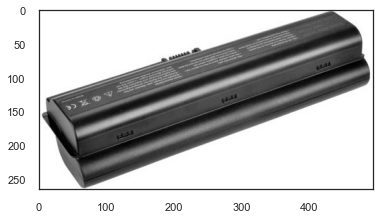

In [135]:
filename = path + list_photos_train[1]
image = cv2.imread(filename)
plt.imshow(image)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\battery.png", transparent=True, dpi=300)

plt.show()

### SIFT descriptors

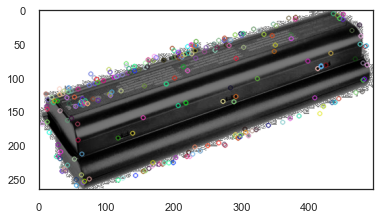

Descriptors :  (249, 128)

[[13.  2.  0. ...  0.  0.  0.]
 [ 0. 18. 55. ...  0.  0.  1.]
 [ 1.  0.  0. ...  0.  0.  1.]
 ...
 [ 6.  7. 44. ...  0.  0.  0.]
 [14. 10.  7. ...  0.  0.  0.]
 [ 5.  2.  0. ...  3.  2. 13.]]


In [136]:
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos_train[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\battery_descriptors.png", transparent=True, dpi=300)

plt.show()
print("Descriptors : ", des.shape)
print()
print(des)

### Pre-processing of descriptors via SIFT

In [137]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos_train)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos_train[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_train_by_img = np.asarray(sift_keypoints)
sift_keypoints_train    = np.concatenate(sift_keypoints_train_by_img, axis=0)

print()
print("Number de descriptors : ", sift_keypoints_train.shape)

duration1=time.time()-temps1
print("Processing time for SIFT descriptor : ", "%15.2f" % duration1, "seconds")

0
100
200
300
400
500

Number de descriptors :  (258531, 128)
Processing time for SIFT descriptor :           117.84 seconds


C:\Users\vince\AppData\Local\Temp/ipykernel_16836/2866865195.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_train_by_img = np.asarray(sift_keypoints)


### Descriptor clusters

In [138]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_train)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_train)

duration1=time.time()-temps1
print("Processing time for kmeans : ", "%15.2f" % duration1, "seconds")

Nombre de clusters estimés :  508
Création de 508 clusters de descripteurs ...
Processing time for kmeans :            17.47 seconds


### Image features

In [139]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("picture histogram issue: ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors_train=[]

for i, image_desc in enumerate(sift_keypoints_train_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors_train.append(hist) #histogram is the feature vector

im_features_train = np.asarray(hist_vectors_train)

duration1=time.time()-temps1
print("Time to create histograms: ", "%15.2f" % duration1, "seconds")


0
100
200
300
400
500
Time to create histograms:             0.90 seconds


In [140]:
len(hist_vectors_train)

527

### T-SNE visualization according to real classes

#### PCA reduction

In [141]:
print("Dataset size before the PCA reduction: ", im_features_train.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features_train)
print("Dataset size after the PCA reduction: ", feat_pca.shape)

Dataset size before the PCA reduction:  (527, 508)
Dataset size after the PCA reduction:  (527, 310)


#### T-SNE reduction

In [142]:
tsne = manifold.TSNE(n_components=2, perplexity=10, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = y_train
print(df_tsne.shape)

C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:349: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:350: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
C:\Users\vince\anaconda3\lib\si

(527, 3)


#### T-SNE visualization

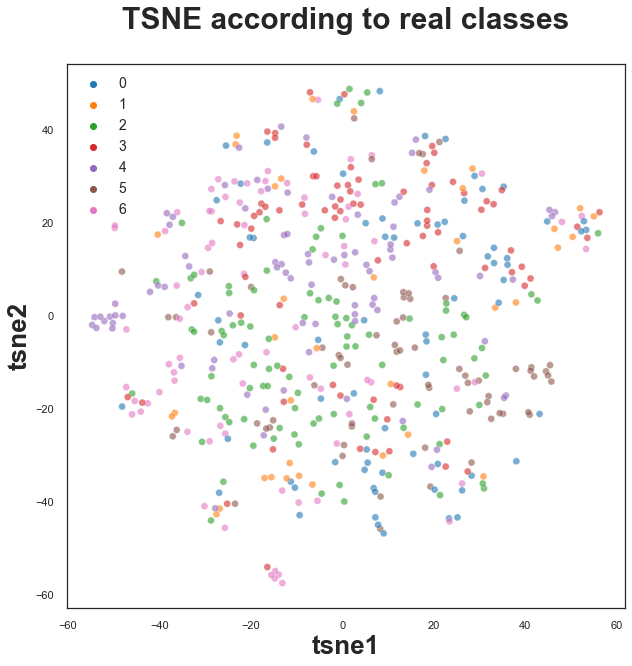

In [143]:
plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE according to real classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\tsne_sift_descriptors_real_classes.png", transparent=True, dpi=300)

plt.show()

## Validation part - preprocessing

In [144]:
# Path definition and loading a list of images
path = "projets\\06_classifiez_automatiquement_des_biens_de_consommation\\Flipkart\\Images/"
list_photos_val = [file for file in X_val["image"]]
print(len(list_photos_val))

226


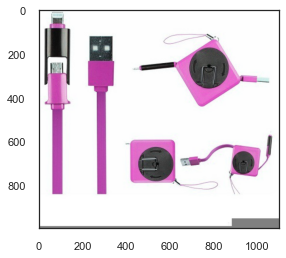

In [145]:
filename = path + list_photos_val[1]
image = cv2.imread(filename)
plt.imshow(image)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\usb_cable.png", transparent=True, dpi=300)

plt.show()

### SIFT descriptors

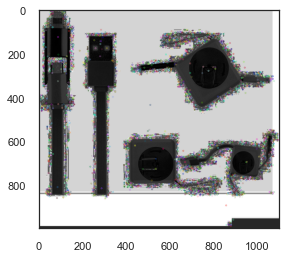

Descriptors :  (3481, 128)

[[  0.   0.   0. ...   2.  65.  62.]
 [  6.   8.   0. ...  46.   0.   0.]
 [  0.  43.  98. ...  40.  29.   3.]
 ...
 [  2.  67.   8. ...  15.   9.   4.]
 [  6.  35.  69. ...   0.   0.   0.]
 [185.   8.   5. ...   0.   0.   1.]]


In [146]:
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos_val[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\usb_cable_descriptors.png", transparent=True, dpi=300)

plt.show()
print("Descriptors : ", des.shape)
print()
print(des)

### Pre-processing of descriptors via SIFT

In [147]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos_val)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos_val[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_val_by_img = np.asarray(sift_keypoints)
sift_keypoints_val = np.concatenate(sift_keypoints_val_by_img, axis=0)

print()
print("Number de descriptors : ", sift_keypoints_val.shape)

duration1=time.time()-temps1
print("Processing time for SIFT descriptor : ", "%15.2f" % duration1, "seconds")

0
100
200

Number de descriptors :  (110550, 128)
Processing time for SIFT descriptor :            88.47 seconds


C:\Users\vince\AppData\Local\Temp/ipykernel_16836/1950147952.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sift_keypoints_val_by_img = np.asarray(sift_keypoints)


### Image features

In [148]:
# Creation of histograms (features)
temps1=time.time()

# Creation of a matrix of histograms
hist_vectors_val=[]

for i, image_desc in enumerate(sift_keypoints_val_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors_val.append(hist) #histogram is the feature vector

im_features_val = np.asarray(hist_vectors_val)

duration1=time.time()-temps1
print("Time to create histograms: ", "%15.2f" % duration1, "seconds")


0
100
200
Time to create histograms:             0.40 seconds


## Naive-Bayes classifier

In [149]:
# Declare the model
clf = MultinomialNB()

# Timer start
start_time = timeit.default_timer()

# Train the model
clf.fit(hist_vectors_train, y_train)

# Make predictions 
y2_val_predict = clf.predict(hist_vectors_val)

# Timer end
elapsed = timeit.default_timer() - start_time


In [150]:
# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))

Weighted Precision: 0.03
Weighted Recall: 0.18
Weighted F1-score : 0.06; time: 0.02s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [151]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.18


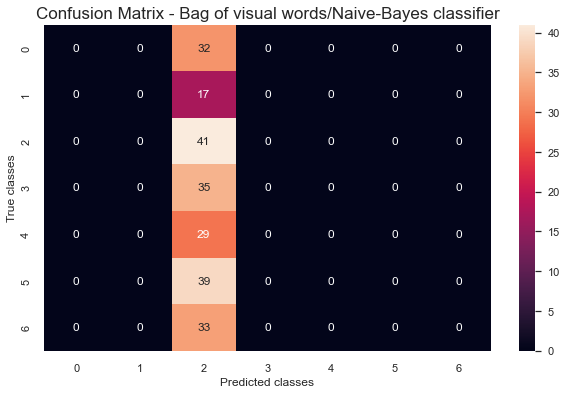

In [152]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Bag of visual words/Naive-Bayes classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\Bag of visual words + Naive-Bayes classifier.png", transparent=True, dpi=300)

plt.show()

## Random forest classifier

### GridsearchCV

In [153]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12],
    #'max_features': [],
    'min_samples_leaf': [10, 100],
    #'min_samples_split': [],
    'n_estimators': [500, 1000, 1500]
}

# Create a based model
clf = RandomForestClassifier()

# Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score, average='weighted')

# Instantiate the grid search model
clf_gscv = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring=f1_scorer) # n_jobs=-1 for parallelizing search

# Timer start
start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(hist_vectors_train, y_train)

# Make predictions 
y2_val_predict = clf_gscv.predict(hist_vectors_val)

clf_gscv.best_params_

Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  51 out of  54 | elapsed:   10.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed:   10.6s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\vince\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:569: DeprecationWarning: `np.int` is a deprecat

{'bootstrap': True,
 'max_depth': 8,
 'min_samples_leaf': 10,
 'n_estimators': 1500}

In [154]:
# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))

Weighted Precision: 0.43
Weighted Recall: 0.44
Weighted F1-score : 0.41; time: 0.02s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.44


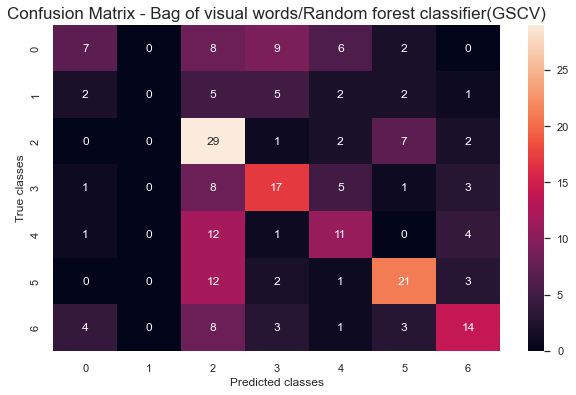

In [156]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Bag of visual words/Random forest classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\Bag of visual words + random forest classifier(GSCV).png", transparent=True, dpi=300)

plt.show()

## SVM Descriptor classifier

In [157]:
# Declare the model
clf = LinearSVC()

# Timer start
start_time = timeit.default_timer()

# Train the model
clf.fit(hist_vectors_train, y_train)

# Make predictions 
y2_val_predict = clf.predict(hist_vectors_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))


Weighted Precision: 0.42
Weighted Recall: 0.38
Weighted F1-score : 0.35; time: 0.04s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [158]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.38


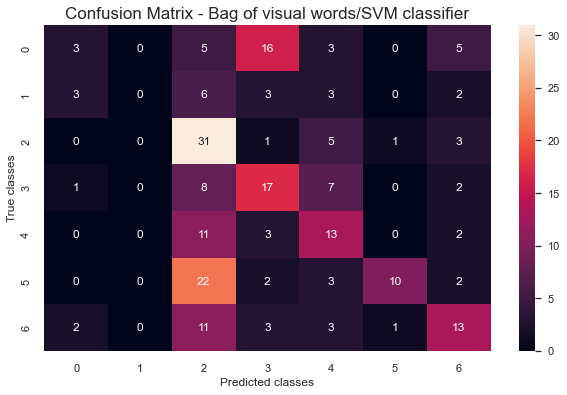

In [159]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Bag of visual words/SVM classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\Bag of visual words + SVM classifier.png", transparent=True, dpi=300)
plt.show()

### GridsearchCV

In [160]:
# GridsearchCV

parameters = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'gamma': ['scale', 'auto']}

# Declare the model
clf = SVC()

# Instantiate the grid search model
clf_gscv = GridSearchCV(clf, parameters, cv = 3, refit = True, verbose = 1)

# Timer start
#start_time = timeit.default_timer()

# Fit the grid search to the data
clf_gscv.fit(hist_vectors_train, y_train)

# Make predictions 
y_val_predict = clf_gscv.predict(hist_vectors_val)

# Timer end
elapsed = timeit.default_timer() - start_time

# best params
clf_gscv.best_params_


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:   13.1s finished
C:\Users\vince\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:844: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [161]:
# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y2_val_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y2_val_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_val, y2_val_predict, average='weighted')
print("Weighted F1-score : {:.2f}; time: {:.2f}s".format(f1, elapsed))

Weighted Precision: 0.42
Weighted Recall: 0.38
Weighted F1-score : 0.35; time: 14.49s


C:\Users\vince\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [162]:
# Accuracy score 
accuracy = round(accuracy_score(y_val, y2_val_predict),2)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.38


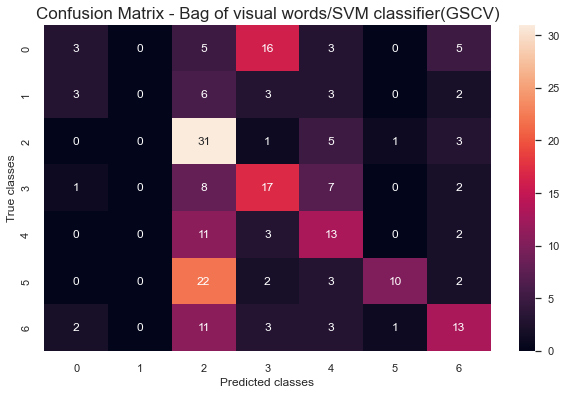

In [163]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_val, y2_val_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix - Bag of visual words/SVM classifier(GSCV)', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\sift_process\\Bag of visual words + SVM classifier(GSCV).png", transparent=True, dpi=300)

plt.show()

# COMPUTER VISION (CNN)

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import tensorflow as tf

from pathlib import Path

In [165]:
# Test data reading with path information
flipkart_dataset_test = pd.read_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\flipkart_dataset_modified_test.csv',sep=',')
flipkart_dataset_test

uniq_id            crawl_timestamp  \
0    688bb32bf0d9b6e350d2c0912a3b7c9f  2016-03-02 16:58:31+00:00   
1    7c15895bbfd7da97c219be5b28150a06  2016-03-02 16:58:31+00:00   
2    8876d7569efdaff5a21b33a1ab44a13d  2016-03-02 16:58:31+00:00   
3    45204a03550940bdcbc8e4703c07f550  2016-03-02 16:58:31+00:00   
4    c2efa8aa11898bdb5fc4e46201973a42  2016-03-02 16:58:31+00:00   
..                                ...                        ...   
292  640fd08bb3ba538d67a5c0c2c61a5c4c  2016-06-24 16:03:26+00:00   
293  a63eecfbb02004863fa1f29a0b8105fc  2016-06-24 16:03:26+00:00   
294  5c77aa1fc09901ae07c392c152a70e41  2016-06-24 16:03:26+00:00   
295  5fdb912462da9891e5b21c677ceb15e4  2016-06-26 09:25:14+00:00   
296  78fcb634d9838127464d827234ab05ad  2016-06-26 14:21:24+00:00   

                                           product_url  \
0    http://www.flipkart.com/my-little-lambs-baby-g...   
1    http://www.flipkart.com/toddla-baby-girl-s-gat...   
2    http://www.flipkart.com/mkb-baby-girl-s-shirt-...   
3    http://www.flipkart.com/brahmz-glass-mossiac-t...   
4    http://www.flipkart.com/baby-moshai-girl-s-a-l...   
..                                                 ...   
292  http://www.flipkart.com/sos-computrised-lcd-in...   
293  http://www.flipkart.com/shopizone-bmw-wheel-32...   
294  http://www.flipkart.com/craftcart-parrot-antiq...   
295  http://www.flipkart.com/brass-gift-center-show...   
296  http://www.flipkart.com/happiness-printed-bone...   

                                          product_name  \
0           My Little Lambs Baby Girl's Gathered Dress   
1                    Toddla Baby Girl's Gathered Dress   
2                          MKB Baby Girl's Shirt Dress   
3                      Brahmz Glass Mossiac Table Lamp   
4                 Baby Moshai Baby Girl's A-line Dress   
..                                                 ...   
292  SOS COMPUTRISED LCD INTRFERENTIAL UNIT-125PROG...   
293               Shopizone BMW Wheel 32 GB  Pen Drive   
294          Craftcart Parrot Antique Brass Key Holder   
295              brass gift center Showpiece  -  48 cm   
296                Happiness Is Printed Bone China Mug   

                                 product_category_tree               pid  \
0    ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEG9JRZUZM5CBH   
1    ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEG78PDRW4GCD8   
2    ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEGCS8RJAYEGAR   
3    ["Home Decor & Festive Needs >> Decorative Lig...  TLPEG6GRYTC6JQEB   
4    ["Baby Care >> Infant Wear >> Baby Girls' Clot...  DREEFFG5PA6AVFH9   
..                                                 ...               ...   
292  ["Beauty and Personal Care >> Health Care >> H...  ELTEJXM48D3HAUFB   
293  ["Computers >> Storage >> Pen Drives >> Shopiz...  ACCEJWJKZAGJFWCB   
294  ["Home Decor & Festive Needs >> Wall Decor & C...  KHREJWM2NDAMPG7J   
295  ["Home Decor & Festive Needs >> Religion & Dev...  SHIEJY5HPVJT9MUE   
296  ["Kitchen & Dining >> Coffee Mugs >> Happiness...  MUGEJZWTW9GYADQT   

     retail_price  discounted_price                                 image  \
0          1550.0            1550.0  688bb32bf0d9b6e350d2c0912a3b7c9f.jpg   
1           999.0             399.0  7c15895bbfd7da97c219be5b28150a06.jpg   
2           825.0             625.0  8876d7569efdaff5a21b33a1ab44a13d.jpg   
3          1999.0             999.0  45204a03550940bdcbc8e4703c07f550.jpg   
4          2100.0             900.0  c2efa8aa11898bdb5fc4e46201973a42.jpg   
..            ...               ...                                   ...   
292       19500.0           17550.0  640fd08bb3ba538d67a5c0c2c61a5c4c.jpg   
293        1999.0             999.0  a63eecfbb02004863fa1f29a0b8105fc.jpg   
294         799.0             350.0  5c77aa1fc09901ae07c392c152a70e41.jpg   
295        7999.0            4550.0  5fdb912462da9891e5b21c677ceb15e4.jpg   
296         449.0             225.0  78fcb634d9838127464d82

In [166]:
# Train data reading with path information
flipkart_dataset_train = pd.read_csv('projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\flipkart_dataset_modified_train.csv',sep=',')
flipkart_dataset_train

uniq_id            crawl_timestamp  \
0    b551f20c6a8a1dc3d102a5f04bc8d7d6  2015-12-01 06:13:00+00:00   
1    d4b625befbbb7e8004e53c187f286e11  2015-12-01 06:13:00+00:00   
2    417ae3e8b08acc19a023b8a958644799  2015-12-01 06:13:00+00:00   
3    353ddb2c8ab6920d8ad1055abee87dda  2015-12-01 06:13:00+00:00   
4    6634de7b39a5b0658c74ab098450096d  2015-12-01 06:13:00+00:00   
..                                ...                        ...   
748  3589e80e8f7f3f3a5b65447389b90c2e  2016-02-25 09:50:31+00:00   
749  eaed0897074ee52230ff6c6d73c18dd4  2016-02-28 10:36:58+00:00   
750  4d638f7a608a76db27cd7bab13582a93  2016-02-28 10:36:58+00:00   
751  86a39f77de21aa9654e8ea03335244fc  2016-02-28 10:36:58+00:00   
752  6d460d2e12ff7c84cb6b9af783d465ae  2016-02-28 10:36:58+00:00   

                                           product_url  \
0    http://www.flipkart.com/wild-stone-smoke-juice...   
1    http://www.flipkart.com/binatone-wr3000n/p/itm...   
2    http://www.flipkart.com/kamasutra-combo-offer-...   
3    http://www.flipkart.com/tenda-a5/p/itmdp2cxeq6...   
4    http://www.flipkart.com/d-link-dir-816-wireles...   
..                                                 ...   
748  http://www.flipkart.com/miracle-retail-bonsai-...   
749  http://www.flipkart.com/thakkar-baby-girl-s-pr...   
750  http://www.flipkart.com/next-steps-baby-girl-s...   
751  http://www.flipkart.com/intel-3-2-ghz-lga-1150...   
752  http://www.flipkart.com/nammababy-baby-girl-s-...   

                                          product_name  \
0                 Wild Stone Smoke And Juice Combo Set   
1                                     Binatone WR3000N   
2                 Kamasutra Combo Offer Pack Combo Set   
3                                             Tenda A5   
4       D-Link DIR-816 Wireless AC750 Dual Band Router   
..                                                 ...   
748  Miracle Retail Bonsai Wild Plant Artificial Pl...   
749       Thakkar Baby Girl's Printed Top & Pyjama Set   
750    next steps Baby Girl's Striped Top & Pyjama Set   
751              Intel 3.2 GHz LGA 1150 3250 Processor   
752  NammaBaby Baby Girl's Animal Print Top & Pyjam...   

                                 product_category_tree               pid  \
0    ["Beauty and Personal Care >> Fragrances >> De...  CAGE6FZQ3XXVG4V5   
1    ["Computers >> Network Components >> Routers >...  RTRE2TYN2XUPCEVH   
2    ["Beauty and Personal Care >> Fragrances >> De...  CAGDYY25E8RVC7EG   
3    ["Computers >> Network Components >> Routers >...  RTRDNY65WHG9FHTS   
4    ["Computers >> Network Components >> Routers >...  RTRE3XW7JS6YJHG5   
..                                                 ...               ...   
748  ["Home Decor & Festive Needs >> Flowers, Plant...  ARPEFZT4FGYZZHAZ   
749  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG6X5BZEGXPZ2   
750  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTEG48NRGZZSGUH   
751  ["Computers >> Computer Components >> Processo...  PSREGFZ8MXRM6FFQ   
752  ["Baby Care >> Infant Wear >> Baby Girls' Clot...  NSTECQBQFGMTK9TE   

     retail_price  discounted_price                                 image  \
0           360.0             327.0  b551f20c6a8a1dc3d102a5f04bc8d7d6.jpg   
1          2995.0            2500.0  d4b625befbbb7e8004e53c187f286e11.jpg   
2           380.0             358.0  417ae3e8b08acc19a023b8a958644799.jpg   
3          1999.0            1999.0  353ddb2c8ab6920d8ad1055abee87dda.jpg   
4          4200.0            2059.0  6634de7b39a5b0658c74ab098450096d.jpg   
..            ...               ...                                   ...   
748        1299.0             599.0  3589e80e8f7f3f3a5b65447389b90c2e.jpg   
749         500.0             399.0  eaed0897074ee52230ff6c6d73c18dd4.jpg   
750         529.0             309.0  4d638f7a608a76db27cd7bab13582a93.jpg   
751        6100.0            4500.0  86a39f77de21aa9654e8ea03335244fc.jpg   
752         499.0             455.0  6d460d2e12ff7c84cb6b9a

In [167]:
# loading values from a json file
file = open("projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\main_categ_dic.json", "r")
main_categ_dic = json.load(file)

## Data loading and exploration

In [168]:
# train data
data_dir = Path(r'C:/Users/vince/.keras/datasets/flipkart_photos/images_classes_train')
data_dir

WindowsPath('C:/Users/vince/.keras/datasets/flipkart_photos/images_classes_train')

In [169]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

753


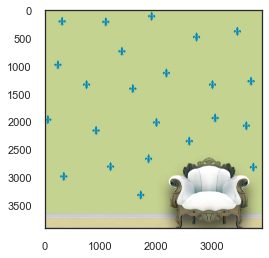

In [170]:
baby_products = list(data_dir.glob('baby_care/*'))
img = PIL.Image.open(str(baby_products[0]))

img.save(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\baby_care_pic.png")

plt.imshow(img)

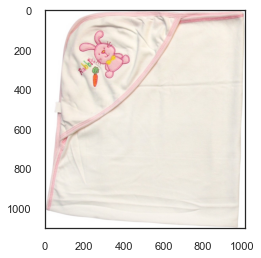

In [171]:
img = PIL.Image.open(str(baby_products[1]))

img.save(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\baby_care_pic_2.png")

plt.imshow(img)

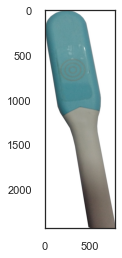

In [172]:
computers = list(data_dir.glob('computers/*'))
img = PIL.Image.open(str(computers[0]))

img.save(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\computers_pic.png")

plt.imshow(img)

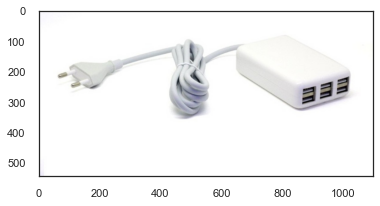

In [173]:
img = PIL.Image.open(str(computers[1]))

img.save(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\computers_pic_2.png")

plt.imshow(img)

## Data download with Keras

### Creation of datasets train/validation

In [174]:
batch_size = 32
img_height = 180
img_width = 180

In [175]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 753 files belonging to 7 classes.
Using 603 files for training.


In [176]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 753 files belonging to 7 classes.
Using 150 files for validation.


In [177]:
class_names = train_ds.class_names
print(class_names)

['baby_care', 'beauty_and_personal_care', 'computers', 'home_decor_festive_needs', 'home_furnishing', 'kitchen_dining', 'watches']


### Data visualization

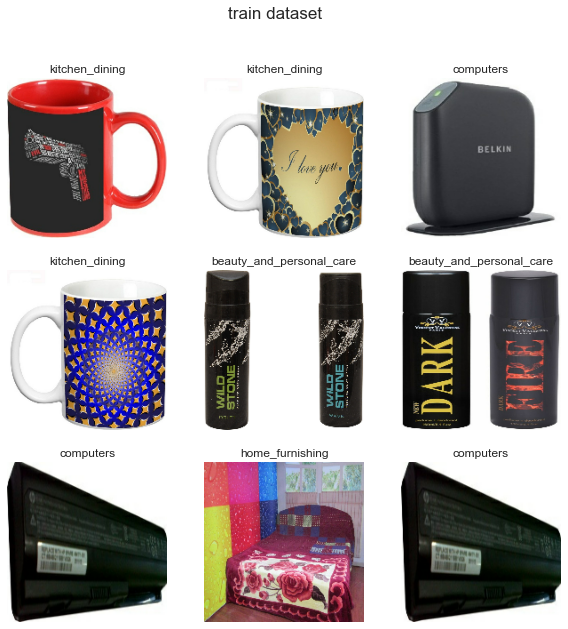

In [178]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
# title
plt.suptitle('train dataset', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\train_ds.png", transparent=True, dpi=300)

In [179]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


### Pipeline configuration

In [180]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Neural Network Sequential model

## Sequential model without data augmentation

In [181]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Model compilation

In [182]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model synthesis & fitting

In [183]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [184]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
19/19 [==============================] - 7s 331ms/step - loss: 2.0505 - accuracy: 0.2289 - val_loss: 1.8261 - val_accuracy: 0.3333
Epoch 2/10
19/19 [==============================] - 5s 286ms/step - loss: 1.5039 - accuracy: 0.5008 - val_loss: 1.4321 - val_accuracy: 0.5267
Epoch 3/10
19/19 [==============================] - 6s 295ms/step - loss: 1.0828 - accuracy: 0.6318 - val_loss: 1.3980 - val_accuracy: 0.5533
Epoch 4/10
19/19 [==============================] - 5s 286ms/step - loss: 0.7526 - accuracy: 0.7811 - val_loss: 1.5717 - val_accuracy: 0.5400
Epoch 5/10
19/19 [==============================] - 5s 285ms/step - loss: 0.5056 - accuracy: 0.8325 - val_loss: 1.5526 - val_accuracy: 0.5667
Epoch 6/10
19/19 [==============================] - 6s 313ms/step - loss: 0.3763 - accuracy: 0.8839 - val_loss: 1.4373 - val_accuracy: 0.5800
Epoch 7/10
19/19 [==============================] - 6s 305ms/step - loss: 0.2572 - accuracy: 0.9254 - val_loss: 1.7153 - val_accuracy: 0.5600
Epoch 

### Training results visualization

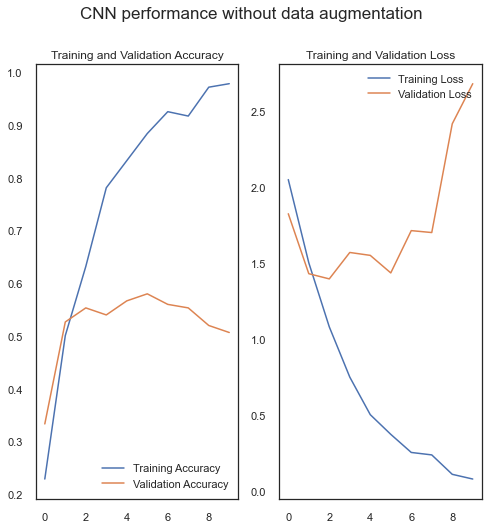

In [185]:
# figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.suptitle("CNN performance without data augmentation",fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\cnn_performance_without_data_augmentation.png", transparent=True, dpi=300)

plt.show()

## Sequential model with data augmentation

### Data augmentation

In [186]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

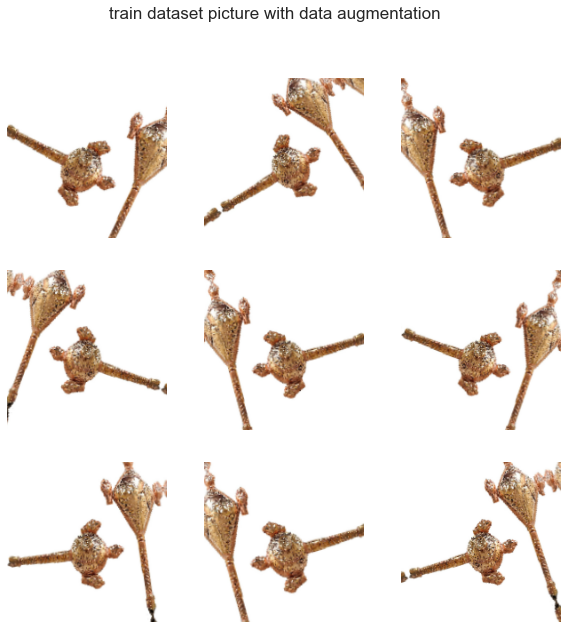

In [187]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# title
plt.suptitle('train dataset picture with data augmentation', fontsize=17)       
        
# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\train_ds_augmented.png", transparent=True, dpi=300)

### Sequential model

In [188]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Model synthesis & fitting

In [189]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [190]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
19/19 [==============================] - 7s 328ms/step - loss: 1.9540 - accuracy: 0.2007 - val_loss: 1.8308 - val_accuracy: 0.2467
Epoch 2/15
19/19 [==============================] - 6s 336ms/step - loss: 1.7684 - accuracy: 0.2886 - val_loss: 1.6042 - val_accuracy: 0.4200
Epoch 3/15
19/19 [==============================] - 6s 337ms/step - loss: 1.5615 - accuracy: 0.4196 - val_loss: 1.4057 - val_accuracy: 0.4933
Epoch 4/15
19/19 [==============================] - 6s 331ms/step - loss: 1.3783 - accuracy: 0.4909 - val_loss: 1.3918 - val_accuracy: 0.5267
Epoch 5/15
19/19 [==============================] - 6s 328ms/step - loss: 1.2879 - accuracy: 0.5041 - val_loss: 1.3582 - val_accuracy: 0.5000
Epoch 6/15
19/19 [==============================] - 6s 334ms/step - loss: 1.1960 - accuracy: 0.5622 - val_loss: 1.2946 - val_accuracy: 0.5600
Epoch 7/15
19/19 [==============================] - 6s 327ms/step - loss: 1.1119 - accuracy: 0.5804 - val_loss: 1.2934 - val_accuracy: 0.5533
Epoch 

### Training results visualization

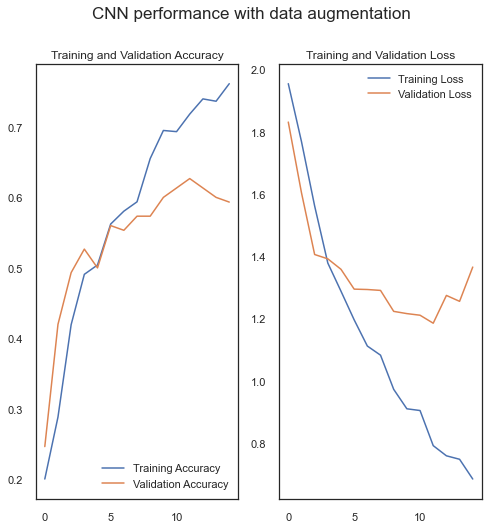

In [191]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.suptitle("CNN performance with data augmentation",fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN\\cnn_performance_with_data_augmentation.png", transparent=True, dpi=300)

plt.show()

# COMPUTER VISION (CNN with transfer learning)

## Model building

In [192]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(180, 180, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(num_classes)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                             

## Train the top layer

In [193]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 xception (Functional)       (None, 6, 6, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                             

In [194]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
19/19 [==============================] - 20s 948ms/step - loss: 1.3928 - accuracy: 0.5556 - val_loss: 0.8857 - val_accuracy: 0.7667
Epoch 2/15
19/19 [==============================] - 18s 942ms/step - loss: 0.6623 - accuracy: 0.8209 - val_loss: 0.6431 - val_accuracy: 0.7933
Epoch 3/15
19/19 [==============================] - 18s 970ms/step - loss: 0.4832 - accuracy: 0.8640 - val_loss: 0.5737 - val_accuracy: 0.8400
Epoch 4/15
19/19 [==============================] - 18s 934ms/step - loss: 0.4136 - accuracy: 0.8756 - val_loss: 0.5451 - val_accuracy: 0.8400
Epoch 5/15
19/19 [==============================] - 18s 953ms/step - loss: 0.3368 - accuracy: 0.9104 - val_loss: 0.5364 - val_accuracy: 0.8333
Epoch 6/15
19/19 [==============================] - 18s 975ms/step - loss: 0.3112 - accuracy: 0.9171 - val_loss: 0.5268 - val_accuracy: 0.8267
Epoch 7/15
19/19 [==============================] - 17s 903ms/step - loss: 0.2797 - accuracy: 0.9254 - val_loss: 0.5269 - val_accuracy: 0.8467

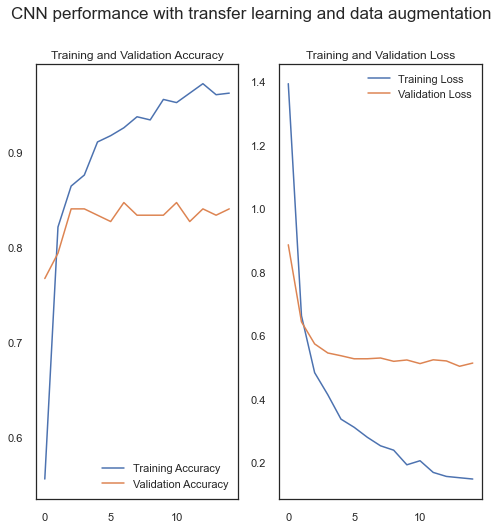

In [195]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.suptitle("CNN performance with transfer learning and data augmentation",fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN_transfer_learning\\cnn_tl_performance_with_data_augmentation.png", transparent=True, dpi=300)

plt.show()

# FINAL MODEL (TEXT & VISION)

## Text Modeling (supervised): Countvectorization SVM

### Count vectorization

In [196]:
# fit and transform
X_test_countvect = cv.transform(flipkart_dataset_test['processed_description'])
words_test_countvect = cv.get_feature_names()

In [197]:
y_test = flipkart_dataset_test['product_class_number']

### Prediction on test data

In [198]:
# Make predictions 
y_test_predict = svm_clf.predict(X_test_countvect)

In [199]:
# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_test_predict, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_test_predict, average='weighted')))

# Evaluate
f1 = f1_score(y_test, y_test_predict, average='weighted')
print("Weighted F1-score : {:.2f}".format(f1))

Weighted Precision: 0.70
Weighted Recall: 0.69
Weighted F1-score : 0.69


In [200]:
# Accuracy score on test data
text_accuracy = round(accuracy_score(y_test, y_test_predict),2)
print('Accuracy: {:.2f}'.format(text_accuracy))

Accuracy: 0.69


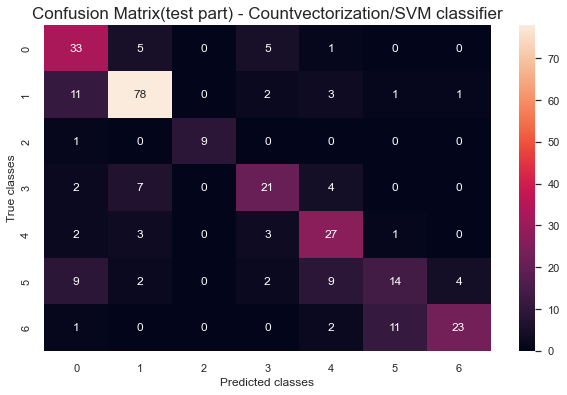

In [201]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_test_predict), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')
plt.title('Confusion Matrix(test part) - Countvectorization/SVM classifier', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\final_model_text_plus_vision\\confusion_matrix_countvec_SVM_classifier_test_part.png", transparent=True, dpi=300)

plt.show()

## Computer Vision (supervised): pre-trained CNN

### Prediction on test data

In [202]:
# test data
data_dir = Path('C:/Users/vince/.keras/datasets/flipkart_photos/images_classes_test')
data_dir

WindowsPath('C:/Users/vince/.keras/datasets/flipkart_photos/images_classes_test')

### Data download with Keras

#### Creation of datasets train/validation

In [203]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=None,
  subset=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 297 files belonging to 7 classes.


In [204]:
class_names = test_ds.class_names
print(class_names)

['baby_care', 'beauty_and_personal_care', 'computers', 'home_decor_festive_needs', 'home_furnishing', 'kitchen_dining', 'watches']


#### Data visualization

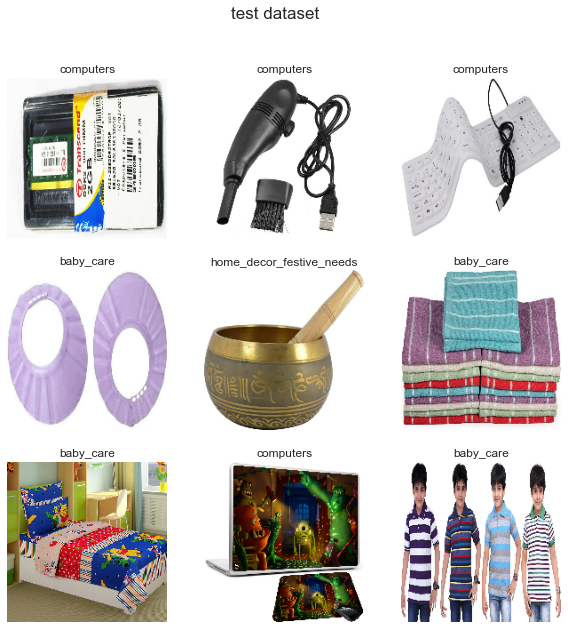

In [205]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# title
plt.suptitle('test dataset', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\vision\\CNN_transfer_learning\\test_ds.png", transparent=True, dpi=300)

In [206]:
for image_batch, labels_batch in test_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


#### Pipeline configuration

In [207]:
AUTOTUNE = tf.data.AUTOTUNE

test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [208]:
preds = model.predict(test_ds)
len(preds)

297

In [209]:
def decode_predictions(preds, top=4, class_list_path='projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\main_categ_dic.json'):
    if len(preds.shape) != 2 or preds.shape[1] != 7: # your classes number
        raise ValueError('`decode_predictions` expects '
                     'a batch of predictions '
                     '(i.e. a 2D array of shape (samples, 1000)). '
                     'Found array with shape: ' + str(preds.shape))
        
    tf = open(class_list_path, "r")
    index_list = json.load(tf)
    
    #index_list = json.load(open(class_list_path))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        #result = [tuple(str(index_list[str(i)])) + (pred[i],) for i in top_indices]
        #result.sort(key=lambda x: x[2], reverse=True)
        results.append(top_indices[0])
    return results

In [210]:
decoded_preds = decode_predictions(preds)
len(decoded_preds)


297

In [211]:
# target
y = list(np.concatenate([y for x, y in test_ds], axis=0))
len(y)


297

In [212]:
# Performance score
print('Weighted Precision: {:.2f}'.format(precision_score(y, decoded_preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y, decoded_preds, average='weighted')))

# Evaluate
f1 = f1_score(y, decoded_preds, average='weighted')
print("Weighted F1-score : {:.2f}".format(f1))

Weighted Precision: 0.73
Weighted Recall: 0.69
Weighted F1-score : 0.70


In [213]:
# Accuracy score on test data
vision_accuracy = round(accuracy_score(y, decoded_preds),2)
print('Accuracy: {:.2f}'.format(vision_accuracy))

Accuracy: 0.69


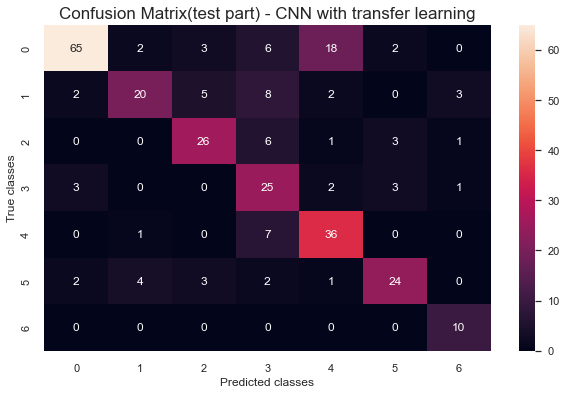

In [214]:
# figure
fig = plt.figure(1, figsize=(10, 6))

# confusion matrix
sns.heatmap(confusion_matrix(y, decoded_preds), annot=True)
plt.ylabel('True classes')
plt.xlabel('Predicted classes')

plt.title('Confusion Matrix(test part) - CNN with transfer learning', fontsize=17)

# Saving
plt.savefig(f"projets\\06_classifiez_automatiquement_des_biens_de_consommation\\production\\savefig\\final_model_text_plus_vision\\confusion_matrix_CNN_transfer_learning_test_part.png", transparent=True, dpi=300)
plt.show()

## Hybrid model perspective

In [215]:
print(f"The test accuracy of the text model (countvectorization + SVM classifier) is: {text_accuracy}")

The test accuracy of the text model (countvectorization + SVM classifier) is: 0.69


In [216]:
print(f"The test accuracy of the vision model (CNN with transfer learning) is: {vision_accuracy}")

The test accuracy of the vision model (CNN with transfer learning) is: 0.69


Case 1: only text or vision data is available.
> We could use one of the models depending on available data 



Case 2: both text and vision data is available
> We could build the final model with votes from text and vision models on classes using weights depending on their respective precision per class. This way, we will benefit from the best model prediction per class.
